In [1]:
# Load libraries.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import time

import datetime # as dt
import re

import warnings
warnings.filterwarnings("ignore")

# Setting baseline seed
np.random.seed(230905)

import pandas_datareader.data as web
from pandas_datareader import data as pdr

import yfinance as yf

(
    yf
    .pdr_override()
)


In [2]:
stock = ["META"]
start=datetime.datetime(2014, 3, 1)
end=datetime.datetime(2023, 2, 15)

# Basics

## Fundamental Financial Calculations

In [6]:
stock_data = pd.read_csv("sp500.csv")

In [2]:
start =\
(
    datetime
    .date(2019, 8, 30)
)

end =\
(
    datetime
    .date(2023, 8, 29)
)

TICKERS =\
    ["AAPL",
     "MSFT",
     "NFLX",
     "AMZN",
     "BA",
     "UAL",
     "GS",
     "JPM"]

def extract_multiple_stocks(TICKERS, start, end):
    def data(ticker):
        return pdr.get_data_yahoo(ticker,
                                  start,
                                  end)
    interim = map(data, TICKERS)
    return pd.concat(interim,
                     keys = TICKERS,
                     names = ["ticker", "date"]
                     )

eight_stocks =\
    extract_multiple_stocks(TICKERS,
                            start,
                            end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
daily_volumes_AMZN =\
(    
    eight_stocks["Volume"]
    .loc["AMZN"] # .loc EXPLICIT LOCATION ACCESSOR .iloc IMPLICIT LOCATION ACCESSOR
)

daily_volumes_AMZN

date
2019-08-30    61174000
2019-09-03    70860000
2019-09-04    46482000
2019-09-05    66216000
2019-09-06    49938000
                ...   
2023-08-22    32935100
2023-08-23    42801000
2023-08-24    43646300
2023-08-25    44147500
2023-08-28    34108400
Name: Volume, Length: 1005, dtype: int64

<BarContainer object of 1005 artists>

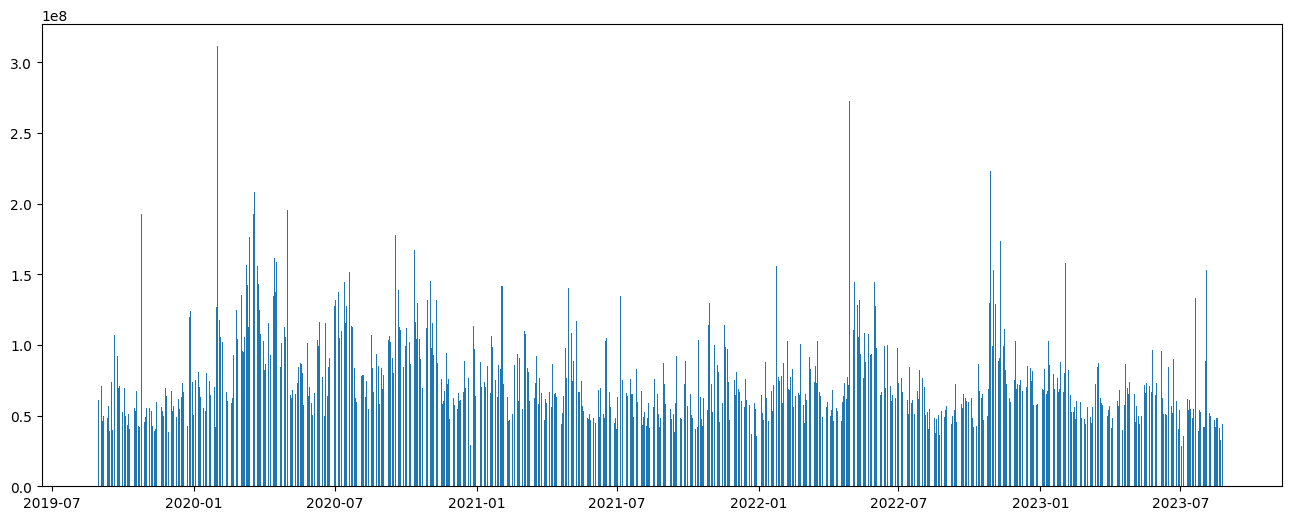

In [8]:
f, ax =\
    (
    plt
    .subplots(figsize = [16, 6]
             )
    )

(
    plt
    .bar(daily_volumes_AMZN.index,
         daily_volumes_AMZN)
)

In [10]:
adjusted_closing_prices

,ticker,date,Adj Close
0,AAPL,2019-08-30,50.754898
1,AAPL,2019-09-03,50.015720
2,AAPL,2019-09-04,50.864311
3,AAPL,2019-09-05,51.858791
4,AAPL,2019-09-06,51.853924
...,...,...,...
8035,JPM,2023-08-22,145.307800
8036,JPM,2023-08-23,146.290543
8037,JPM,2023-08-24,146.151566
8038,JPM,2023-08-25,145.972900


In [9]:
adjusted_closing_prices =\
    (
     eight_stocks[["Adj Close"]]
     .reset_index()
    )

daily_closing_prices_WIDE =\
(
    adjusted_closing_prices
    .pivot(index = "date",
           columns = "ticker",
           values = "Adj Close")
)

In [6]:
dpc_method_pct_change =\
(    daily_closing_prices_WIDE
    .pct_change()
)

dpc_method_pct_change =\
(    dpc_method_pct_change
    .fillna(0)
)

cumulative_daily_return =\
(    
    (1 + dpc_method_pct_change)
     .cumprod()
)

array([[<Axes: xlabel='AAPL', ylabel='AAPL'>,
        <Axes: xlabel='AMZN', ylabel='AAPL'>,
        <Axes: xlabel='BA', ylabel='AAPL'>,
        <Axes: xlabel='GS', ylabel='AAPL'>,
        <Axes: xlabel='JPM', ylabel='AAPL'>,
        <Axes: xlabel='MSFT', ylabel='AAPL'>,
        <Axes: xlabel='NFLX', ylabel='AAPL'>,
        <Axes: xlabel='UAL', ylabel='AAPL'>],
       [<Axes: xlabel='AAPL', ylabel='AMZN'>,
        <Axes: xlabel='AMZN', ylabel='AMZN'>,
        <Axes: xlabel='BA', ylabel='AMZN'>,
        <Axes: xlabel='GS', ylabel='AMZN'>,
        <Axes: xlabel='JPM', ylabel='AMZN'>,
        <Axes: xlabel='MSFT', ylabel='AMZN'>,
        <Axes: xlabel='NFLX', ylabel='AMZN'>,
        <Axes: xlabel='UAL', ylabel='AMZN'>],
       [<Axes: xlabel='AAPL', ylabel='BA'>,
        <Axes: xlabel='AMZN', ylabel='BA'>,
        <Axes: xlabel='BA', ylabel='BA'>,
        <Axes: xlabel='GS', ylabel='BA'>,
        <Axes: xlabel='JPM', ylabel='BA'>,
        <Axes: xlabel='MSFT', ylabel='BA'>,
        <Axes: 

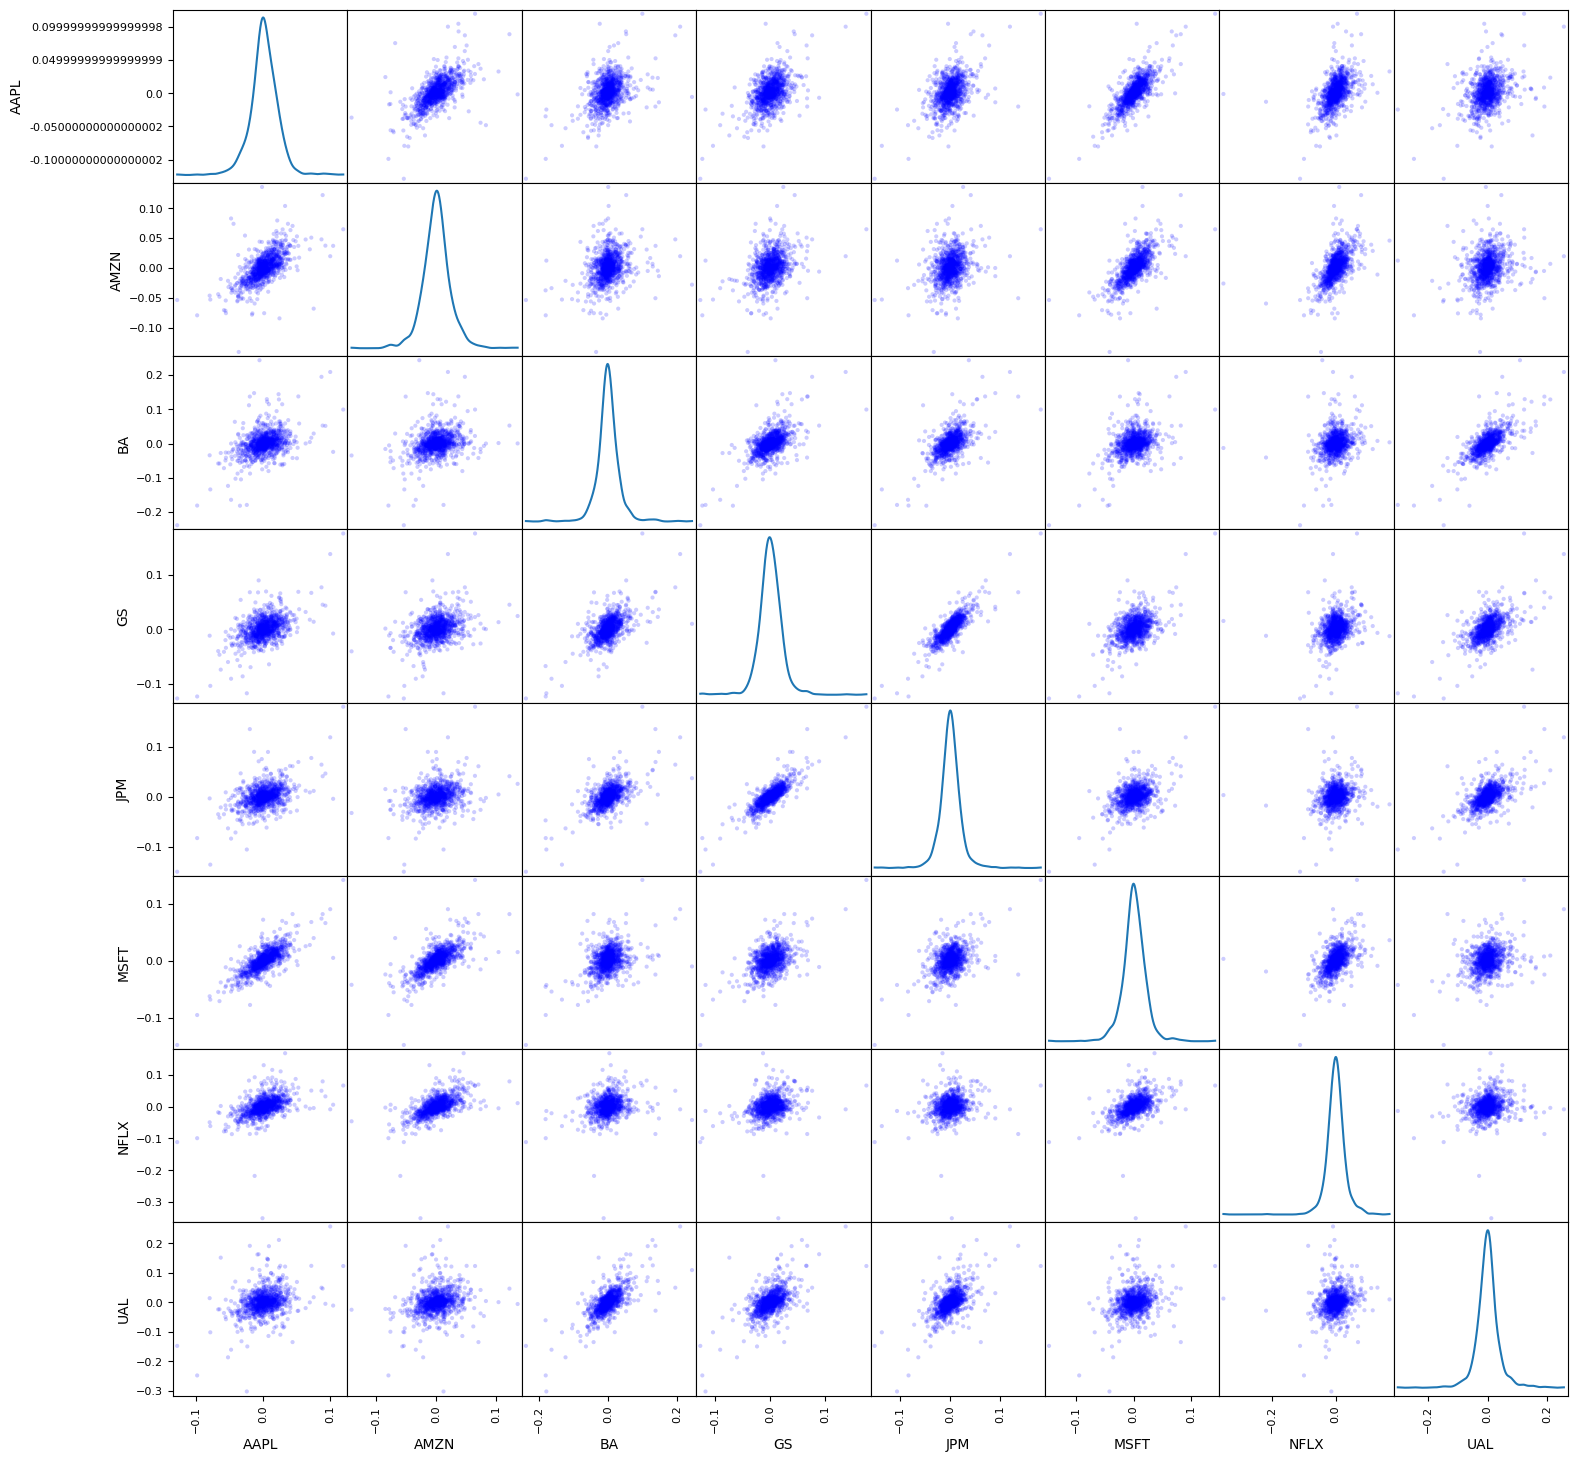

In [7]:
(
    pd
    .plotting
    .scatter_matrix(dpc_method_pct_change,
                    diagonal = "kde", # Kernel Density Estimation
                    color = "blue",
                    alpha = 0.20,
                    figsize = [18, 18]
                   )
)

## Comparing stocks, CORR

In [8]:
SP500 =\
    (
    pdr
        .get_data_yahoo("^GSPC",
                        start,
                        end)
)

SP500_DPC =\
(
    SP500["Adj Close"]
    .pct_change()
    .fillna(0)
)

merged_dpc =\
    (pd
     .concat([SP500_DPC,
              dpc_method_pct_change],
            axis = 1)
    )

merged_dpc =\
    (
    merged_dpc
    .rename(columns = {"Adj Close": "S&P 500"}
           )
)

cumulative_daily_returns = (1 + merged_dpc).cumprod()

corr_dpc =\
    (cumulative_daily_returns
     .corr()
    )

corr_dpc

[*********************100%%**********************]  1 of 1 completed


,S&P 500,AAPL,AMZN,BA,GS,JPM,MSFT,NFLX,UAL
S&P 500,1.000000,0.904378,0.513881,-0.162851,0.927026,0.855137,0.938662,0.293544,-0.166263
AAPL,0.904378,1.000000,0.376120,-0.424682,0.814790,0.635402,0.953346,0.098450,-0.397223
AMZN,0.513881,0.376120,1.000000,-0.226642,0.305079,0.323502,0.462114,0.786609,-0.359068
BA,-0.162851,-0.424682,-0.226642,1.000000,-0.126673,0.237048,-0.351262,0.050369,0.942151
GS,0.927026,0.814790,0.305079,-0.126673,1.000000,0.881155,0.837460,0.164600,-0.112301
JPM,0.855137,0.635402,0.323502,0.237048,0.881155,1.000000,0.716332,0.346571,0.220780
MSFT,0.938662,0.953346,0.462114,-0.351262,0.837460,0.716332,1.000000,0.257395,-0.355385
NFLX,0.293544,0.098450,0.786609,0.050369,0.164600,0.346571,0.257395,1.000000,-0.153323
UAL,-0.166263,-0.397223,-0.359068,0.942151,-0.112301,0.220780,-0.355385,-0.153323,1.000000


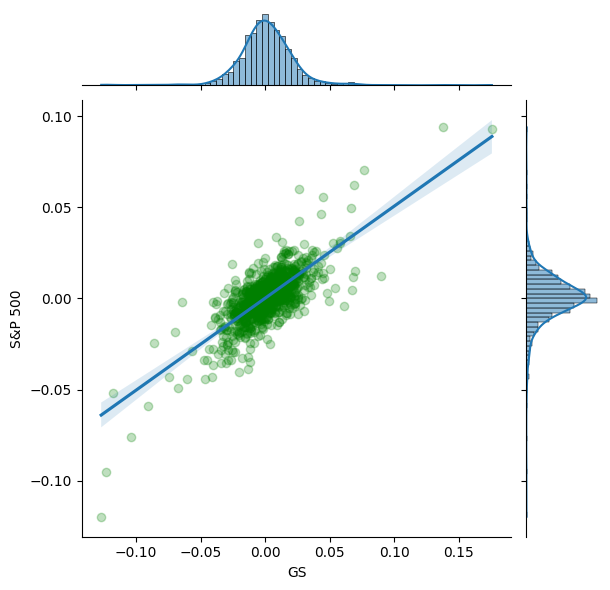

In [9]:
# seaborn is a package for data viz for modeling information

import seaborn as sns

(
    sns
    .jointplot(x = "GS",
               y = "S&P 500",
               data = merged_dpc,
               kind = "reg",
               scatter_kws = {"color": "green",
                              "alpha": 0.25}
              )
)

## Rolling Statistics

In [11]:
stocks =\
    ["META", # Note that FB has been changed to META
     "AMZN",
     "AAPL",
     "NFLX",
     "GOOG"] # GOOGL

def extract_sp(stocks, start, end):
    def data(ticker):
        return(pdr.get_data_yahoo(ticker,
                                  start = start,
                                  end = end)
              )
    FAANG_Stock = map(data, stocks)
    return(pd.concat(FAANG_Stock,
                     keys = stocks,
                     names = ["Company", "Date"]
                    )
          )

FAANG =\
    extract_sp(stocks,
               datetime.datetime(2014, 9, 1),
               datetime.datetime(2021, 8, 31)
              )

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [13]:
Daily_Closing_Price =\
(
FAANG[["Adj Close"]]
    .reset_index()
    .pivot(index = "Date",
           columns = "Company",
           values = "Adj Close")
)

AMZN = Daily_Closing_Price[["AMZN"]]

window = 40

AMZN["mean"] =\
    (
    Daily_Closing_Price[["AMZN"]]
    .rolling(window = window)
    .mean()
    )

AMZN["min"] =\
    (
    Daily_Closing_Price[["AMZN"]]
    .rolling(window = window)
    .min()
    )

AMZN["max"] =\
    (
    Daily_Closing_Price[["AMZN"]]
    .rolling(window = window)
    .max()
    )

AMZN["median"] =\
    (
    Daily_Closing_Price[["AMZN"]]
    .rolling(window = window)
    .median()
    )

AMZN["std"] =\
    (
    Daily_Closing_Price[["AMZN"]]
    .rolling(window = window)
    .std()
    )

AMZN["EWMA"] =\
    (
    Daily_Closing_Price[["AMZN"]]
    .ewm(halflife = 0.5,
         min_periods = window)
    .mean()
    )

AMZN =\
(
    AMZN
    .dropna()
)

AMZN.head()

Company,AMZN,mean,min,max,median,std,EWMA
Date,,,,,,,
2014-10-27,14.4985,16.044688,14.353,17.319000,16.128500,0.671433,14.543570
2014-10-28,14.7795,15.986200,14.353,17.319000,16.116000,0.677321,14.720518
2014-10-29,14.7060,15.930100,14.353,17.319000,16.103251,0.688288,14.709630
2014-10-30,14.9535,15.871500,14.353,17.319000,16.093750,0.668379,14.892532
2014-10-31,15.2730,15.820350,14.353,17.117001,16.005750,0.632066,15.177883


<Axes: xlabel='Date'>

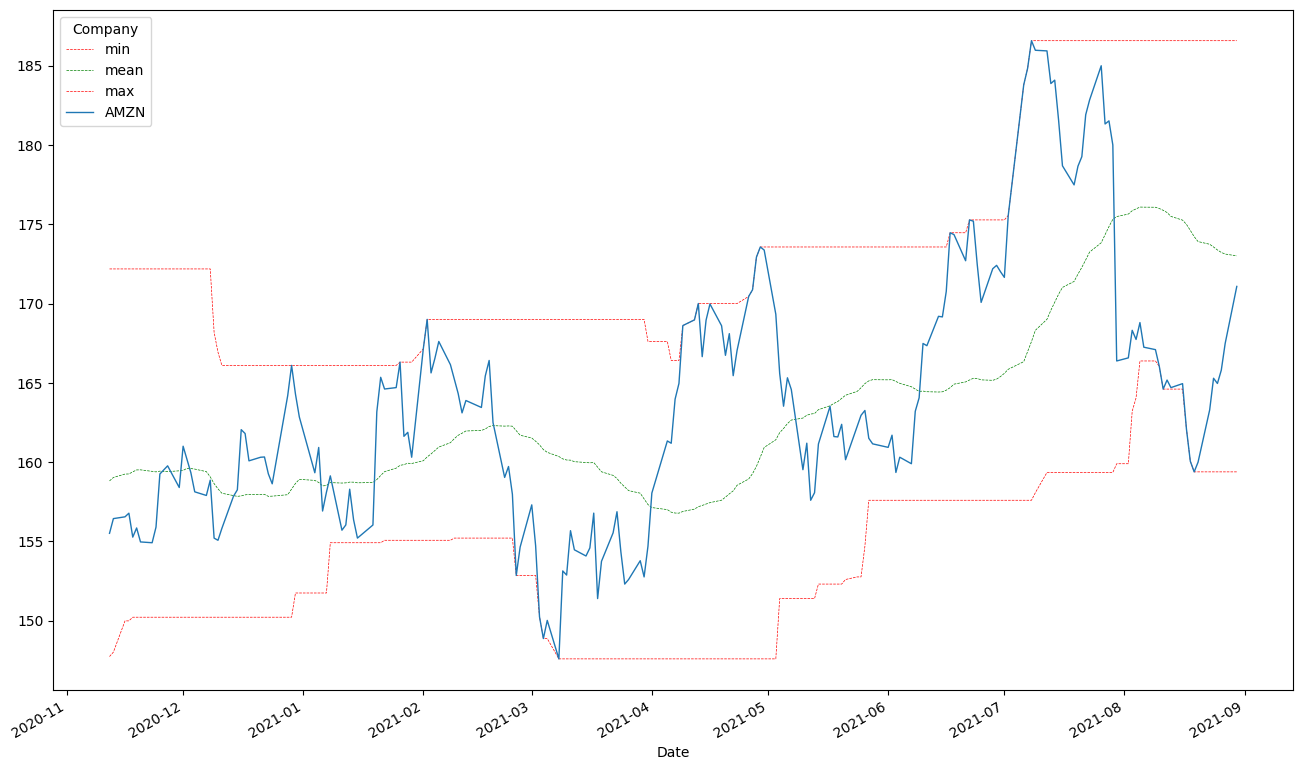

In [15]:
ax =\
    (
     AMZN[["min", "mean", "max"]]
     .iloc[-200: ]
     .plot(figsize = [16, 10],
           style = ["r--", "g--", "r--"],
           lw = 0.50)
    )

(
    Daily_Closing_Price[["AMZN"]]
    .iloc[-200:]
    .plot(ax = ax,
          lw = 1)
)

## Rename Columns

In [94]:
fx =\
(    pdr
    .get_data_fred("DEXUSEU",
                   start = datetime.datetime(2012, 9, 9),
                   end = datetime.datetime(2023, 9, 8)
                  )
    .dropna()
)

fx


,DEXUSEU
DATE,
2012-09-10,1.2795
2012-09-11,1.2858
2012-09-12,1.2894
2012-09-13,1.2912
2012-09-14,1.3142
...,...
2023-09-01,1.0787
2023-09-05,1.0727
2023-09-06,1.0714


In [95]:
fx = fx.reset_index()
fx

,DATE,DEXUSEU
0,2012-09-10,1.2795
1,2012-09-11,1.2858
2,2012-09-12,1.2894
3,2012-09-13,1.2912
4,2012-09-14,1.3142
...,...,...
2744,2023-09-01,1.0787
2745,2023-09-05,1.0727
2746,2023-09-06,1.0714
2747,2023-09-07,1.0704


In [96]:
rx =\
(
    fx
    .rename(columns = {"DATE": "Date","DEXUSEU": "Price"}
           )
)

rx

,Date,Price
0,2012-09-10,1.2795
1,2012-09-11,1.2858
2,2012-09-12,1.2894
3,2012-09-13,1.2912
4,2012-09-14,1.3142
...,...,...
2744,2023-09-01,1.0787
2745,2023-09-05,1.0727
2746,2023-09-06,1.0714
2747,2023-09-07,1.0704


In [98]:
rx.set_index(rx["Date"],inplace = True)
rx

,Date,Price
Date,,
2012-09-10,2012-09-10,1.2795
2012-09-11,2012-09-11,1.2858
2012-09-12,2012-09-12,1.2894
2012-09-13,2012-09-13,1.2912
2012-09-14,2012-09-14,1.3142
...,...,...
2023-09-01,2023-09-01,1.0787
2023-09-05,2023-09-05,1.0727
2023-09-06,2023-09-06,1.0714


In [99]:
rx.drop('Date', axis=1, inplace=True)
rx

,Price
Date,
2012-09-10,1.2795
2012-09-11,1.2858
2012-09-12,1.2894
2012-09-13,1.2912
2012-09-14,1.3142
...,...
2023-09-01,1.0787
2023-09-05,1.0727
2023-09-06,1.0714


# Performance Metrics

## Drawdown

### Calculate

In [3]:
def calculate_drawdown_periods(stock_data_df):
    # Extract date and return data
    dates = stock_data_df.index
    returns = stock_data_df["cumulative_strategy_returns"]

    # Create a DataFrame with date and return columns
    df = pd.DataFrame({'Date': dates, 'returns': returns})

    # Calculate maximum returns and drawdown
    df["MAX_returns"] = df["returns"].cummax()
    drawdown = (df["returns"] / df["MAX_returns"]) - 1
    df["drawdown"] = drawdown

    drawdowns = []
    drawdown_periods = []
    start_date = None
    dd = 0

    for date, i in zip(df['Date'], df["drawdown"]):
        if i < 0:
            if start_date is None:
                start_date = date
                # Check for Monday
                if start_date.weekday() == 0:
                    start_date = start_date - datetime.timedelta(days=3)
                else:
                    start_date = start_date - datetime.timedelta(days=1)
            if i < dd:
                dd = i
        elif i == 0:
            if start_date is not None:
                end_date = date
                drawdown_periods.append((end_date - start_date).days)
                drawdowns.append(dd)
                start_date = None
                dd = 0

    if start_date is not None:
        end_date = df['Date'].iloc[-1]
        drawdown_periods.append((end_date - start_date).days)
        drawdowns.append(dd)

    # Store drawdown periods and values
    drawdown_data = dict(zip(drawdown_periods, drawdowns))

    return drawdown_data

In [1]:
def max_daily_drawdown(data, window):
    
    rolling_max = data["Adj Close"].rolling(window=window, min_periods=1).max()
    daily_drawdown = (data["Adj Close"] / rolling_max - 1.0)
    max_daily_drawdown = daily_drawdown.rolling(window=window, min_periods=1).min()
    return max_daily_drawdown

### Plot

In [4]:
def plot_returns_and_max_returns(stock_data):
    dates = stock_data.index
    returns = stock_data['cumulative_strategy_returns']
    max_returns = stock_data['max_gross_strategy_performance']

    plt.figure(figsize=(12, 6))
    plt.plot(dates, returns, label='Strategy Returns', color='blue')
    plt.plot(dates, max_returns, label='Max Returns', color='green')
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.title('Returns vs Max Returns')
    plt.legend()
    plt.show()

## Sharpe

In [5]:
def calculate_sharpe_ratio(returns_data):
    
    # Calculate the Sharpe ratio (assuming 253 trading days in a year)
    sharpe = np.sqrt(253) * (returns_data["strategy_returns"].mean() / returns_data["strategy_returns"].std())

    return sharpe

In [6]:
def calculate_annual_sharpe_ratio(returns_data):
    annualized_sharpe =\
    (
        np.sqrt(253) * (returns_data['cumulative_strategy_returns'] / returns_data['cumulative_strategy_returns'].shift(1)-1).mean()\
                    / (returns_data['cumulative_strategy_returns'] / returns_data['cumulative_strategy_returns'].shift(1)-1).std()
    )

    return annualized_sharpe

## CAGR

In [7]:
def calculate_cagr(stocks_data):
    # Calculate the number of trading days
    days = (stocks_data.index[-1] - stocks_data.index[0]).days

    # Calculate the CAGR
    cagr = (
        ((stocks_data["Adj Close"][-1] / stocks_data["Adj Close"][0]) ** (365.0 / days))
        - 1
    )

    return cagr

## Annual Returns

In [8]:
def annual_returns(stock_data):
    stock_data['year'] = stock_data.index.year
 
    last= stock_data.groupby('year')[['cumulative_strategy_returns']].last()
    
    #The column value is initialized to NaN 
    last['year_returns'] = np.nan
    
    #run a for loop here for calculating the annual return of each year. 
    for i in range(len(last)):
        if i == 0:
            last['year_returns'].iloc[i] = (last['cumulative_strategy_returns'].iloc[i]/1-1)*100
        else:
            last['year_returns'].iloc[i] = \
                (last['cumulative_strategy_returns'].iloc[i] / last['cumulative_strategy_returns'].iloc[i - 1] - 1)*100
    return last

In [9]:
def annual_returns_sort(stock_data):
    stock_data['year'] = stock_data.index.year
 
    last= stock_data.groupby('year')[['cumulative_strategy_returns']].last()
    
    #The column value is initialized to NaN 
    last['year_returns'] = np.nan
    
    #run a for loop here for calculating the annual return of each year. 
    for i in range(len(last)):
        if i == 0:
            last['year_returns'].iloc[i] = (last['cumulative_strategy_returns'].iloc[i]/1-1)*100
        else:
            last['year_returns'].iloc[i] = \
                (last['cumulative_strategy_returns'].iloc[i] / last['cumulative_strategy_returns'].iloc[i - 1] - 1)*100
    
    average_annual_returns = last['year_returns'].mean()
    low_returns_years = last[last['year_returns'] < average_annual_returns]
    high_returns_years = last[last['year_returns'] > average_annual_returns]
        
    print(f"average annual returns is {average_annual_returns}")
    print(low_returns_years)
    print(high_returns_years)

# Trading Strategy

## Simple Momentum Trading/Moving Averages Strategy

In [81]:
stock = ["META"]
start=datetime.datetime(2014, 3, 1)
end=datetime.datetime(2023, 2, 15)

### Signals

In [82]:
def moving_average_crossover(stock_symbol, short_period, long_period, start_date, end_date):

    # Download stock data
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

    # Create a DataFrame to store signals for the current stock
    signals = pd.DataFrame(index=stock_data.index)
    signals["BUY_or_SELL"] = 0.0

    signals["Close"] = stock_data["Close"]
    signals["Adj Close"] = stock_data["Adj Close"]

    # Calculate short-term SMA
    signals["shorter_SMA"] = stock_data["Adj Close"].rolling(window=short_period).mean()

    # Calculate long-term SMA
    signals["longer_SMA"] = stock_data["Adj Close"].rolling(window=long_period).mean()

    # Create a signal when the short moving average crosses the long moving average
    signals["BUY_or_SELL"][short_period:] = np.where(
        signals["shorter_SMA"][short_period:] > signals["longer_SMA"][short_period:], 1, 0
    )

    # Calculate the difference between the signals to make trading orders
    signals["Positions"] = np.where(
        signals["shorter_SMA"] > signals["longer_SMA"], 1, -1
    )

    # Position Marker
    signals["mPositions"] = signals["BUY_or_SELL"].diff()

    signals = signals.dropna()

    # Calculate Log returns
    signals["log_returns"] = np.log(stock_data["Adj Close"] / stock_data["Adj Close"].shift(1))

    # Derives the log returns of the strategy given the positionings and market returns.
    signals["strategy_returns"] = (signals["Positions"].shift(1) * signals["log_returns"])

    # Cumulative returns
    signals["cumulative_returns"] = signals["log_returns"].cumsum().apply(np.exp)

    # Cumulative strategy returns
    signals["cumulative_strategy_returns"] = signals["strategy_returns"].cumsum().apply(np.exp)

    # Max gross performance
    signals["max_gross_performance"] = signals["cumulative_returns"].cummax()

    # Max gross strategy performance
    signals["max_gross_strategy_performance"] = signals["cumulative_strategy_returns"].cummax()

    return signals

In [83]:
SMA = moving_average_crossover(stock, 20, 60, start, end)

[*********************100%%**********************]  1 of 1 completed


In [84]:
SMA["Positions"].value_counts()

Positions
 1    1374
-1     823
Name: count, dtype: int64

#### FRED

In [14]:
fx =\
(    pdr
    .get_data_fred("DEXUSEU",
                   start = datetime.datetime(2012, 9, 9),
                   end = datetime.datetime(2023, 9, 8)
                  )
    .dropna()
)

fx =\
(
    fx
    .rename(columns = {"DEXUSEU": "Price"}
           )
)

fx["SMA_40"] =\
(
    fx
    ["Price"]
    .rolling(window = 40)
    .mean()
)

# LSMA

fx["SMA_250"] =\
(
    fx
    ["Price"]
    .rolling(250)
    .mean()
)

fx["positions"] =\
(
    np
    .where(fx["SMA_40"] > fx["SMA_250"],
           1, -1)
    # golden, dead
)

fx =\
(
    fx
    .dropna()
)


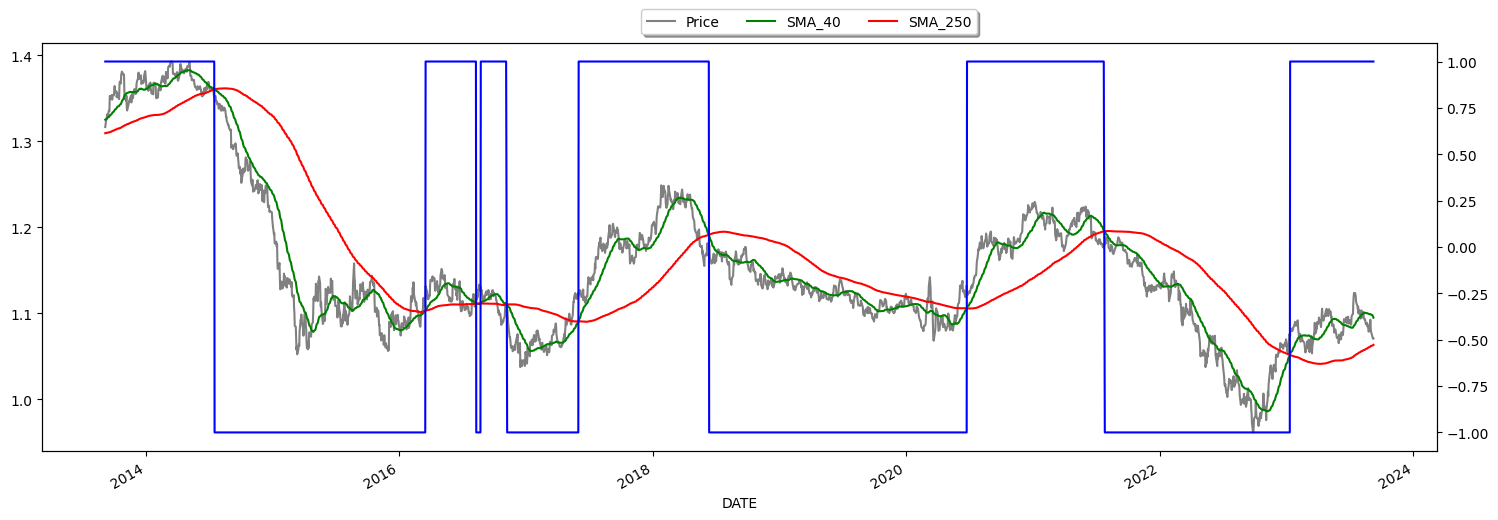

In [15]:
ax =\
(
    fx
    [["Price", 
      "SMA_40", 
      "SMA_250", 
      "positions"]]
    .plot(secondary_y = "positions",
          style = ["grey", 
                   "green",
                   "red",
                   "blue"],
          figsize = [18, 6]
         )
)

(
    ax
    .legend(loc = "upper center",
            shadow = True,
            ncol = 4,
            bbox_to_anchor = (0.55, 1.10),
            fancybox = True)
)

In [16]:
fx["log_returns"] =\
(
    np
    .log(fx["Price"] / fx["Price"].shift(1)
        )
)
fx["strategy_returns"] =\
(
    fx["positions"]
    .shift(1) 
    * 
    fx["log_returns"]
)



### Plot Signals

In [6]:
def plot_signals_for_single_stock(signals_df):
    # Create the figure and subplot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the closing price in gray
    signals_df["Adj Close"].plot(ax=ax, color="grey", lw=0.80, label="Close Price")

    # Plot short and long moving averages
    signals_df[["shorter_SMA", "longer_SMA"]].plot(
        ax=ax, style=["--", "--"], lw=0.80, label=["Shorter SMA", "Longer SMA"]
    )

    # Plot buy signals (green triangles)
    ax.plot(
        signals_df.loc[signals_df.mPositions == 1.0].index,
        signals_df.shorter_SMA[signals_df.mPositions == 1.0],
        "^",
        color="green",
        markersize=12,
        label="Buy Signal",
    )

    # Plot sell signals (red triangles)
    ax.plot(
        signals_df.loc[signals_df.mPositions == -1.0].index,
        signals_df.shorter_SMA[signals_df.mPositions == -1.0],
        "v",
        color="red",
        markersize=12,
        label="Sell Signal",
    )

    ax.set_title("Moving Average Crossover Strategy")
    ax.legend()
    plt.tight_layout()
    plt.show()


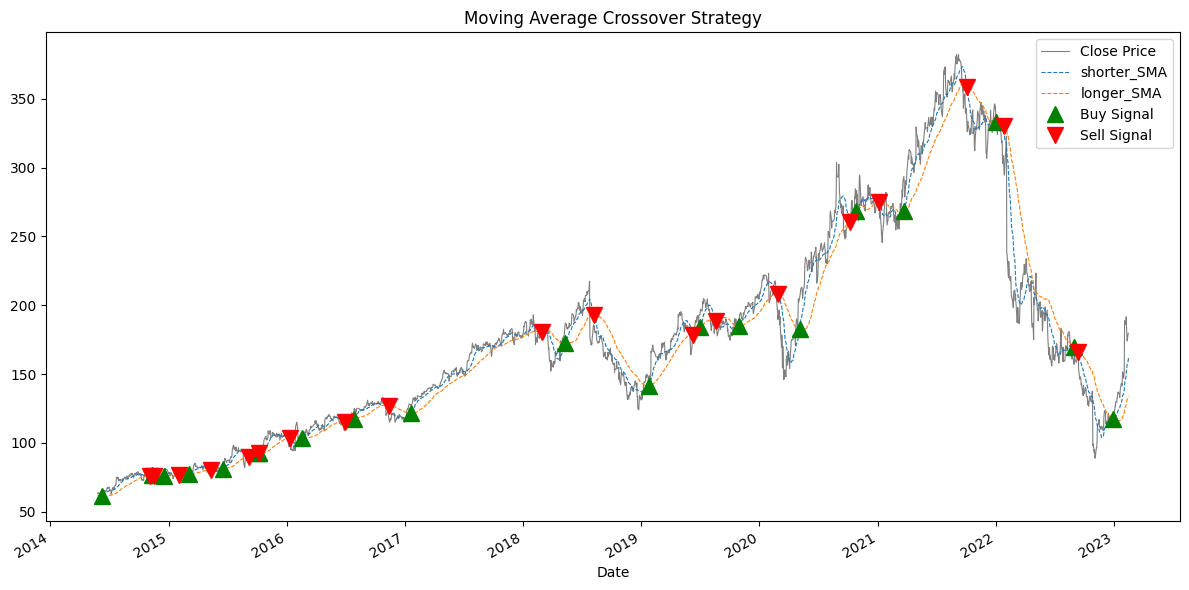

In [18]:
plot_signals_for_single_stock(SMA)

### Backtesting

In [131]:
def calculate_portfolio_metrics_single_stock(signals_df, initial_capital):
    # Step 1: Create a DataFrame to store position information
    position = pd.DataFrame(index=signals_df.index).fillna(0.0)

    # Step 2: Create a column for the current stock in our_position
    position["Position"] = 200 * signals_df["BUY_or_SELL"]


    # Step 3: Create a DataFrame to store the market value of open positions
    portfolio = position.multiply(signals_df["Adj Close"], axis=0)

    # Step 4: Calculate the difference in shares owned
    difference_in_shares_owned = position.diff()
    portfolio["mPositions"] = signals_df["mPositions"]

    # Step 5: Create a column for our_holdings
    portfolio["Our Holdings"] = position.multiply(signals_df["Adj Close"], axis=0).sum(axis=1)

    # Step 6: Create a column for our_cash
    portfolio["Our Cash"] = (
        initial_capital
        - difference_in_shares_owned.multiply(signals_df["Adj Close"], axis=0).sum(axis=1).cumsum()
    )

    # Step 7: Create a column for total portfolio value
    portfolio["total"] = portfolio["Our Cash"] + portfolio["Our Holdings"]

    # Step 8: Create a column for portfolio returns
    portfolio["Strategy Returns"] = portfolio["total"].pct_change()

    # Drawdowns
    portfolio["MAX Returns"] = portfolio["Strategy Returns"].cummax()
    drawdown = (portfolio["Strategy Returns"] / portfolio["MAX Returns"]) - 1
    portfolio["Drawdown"] = drawdown

    return portfolio

In [132]:
SMA_portfolio = calculate_portfolio_metrics_single_stock(SMA, 5e6)

In [133]:
SMA_portfolio["mPositions"].value_counts()

mPositions
 0.0    2158
 1.0      20
-1.0      19
Name: count, dtype: int64

In [118]:
def plot_portfolio(portfolio_df):
       
    # Plot the total portfolio value for the current stock
    portfolio_df["total"].plot(figsize = [16, 10])

    # Plot buy signals (green triangles)
    plt.plot(
        portfolio_df.loc[portfolio_df["mPositions"] == 1.0].index,
        portfolio_df["total"][portfolio_df["mPositions"] == 1.0],
        "^",
        color="green",
        markersize=10,
        label="Buy Signal",
    )

    # Plot sell signals (red triangles)
    plt.plot(
        portfolio_df.loc[portfolio_df["mPositions"] == -1.0].index,
        portfolio_df["total"][portfolio_df["mPositions"] == -1.0],
        "v",
        color="red",
        markersize=10,
        label="Sell Signal",
    )

    plt.ylabel("Value of Our Portfolio (USD)")
    plt.legend()
    plt.show()

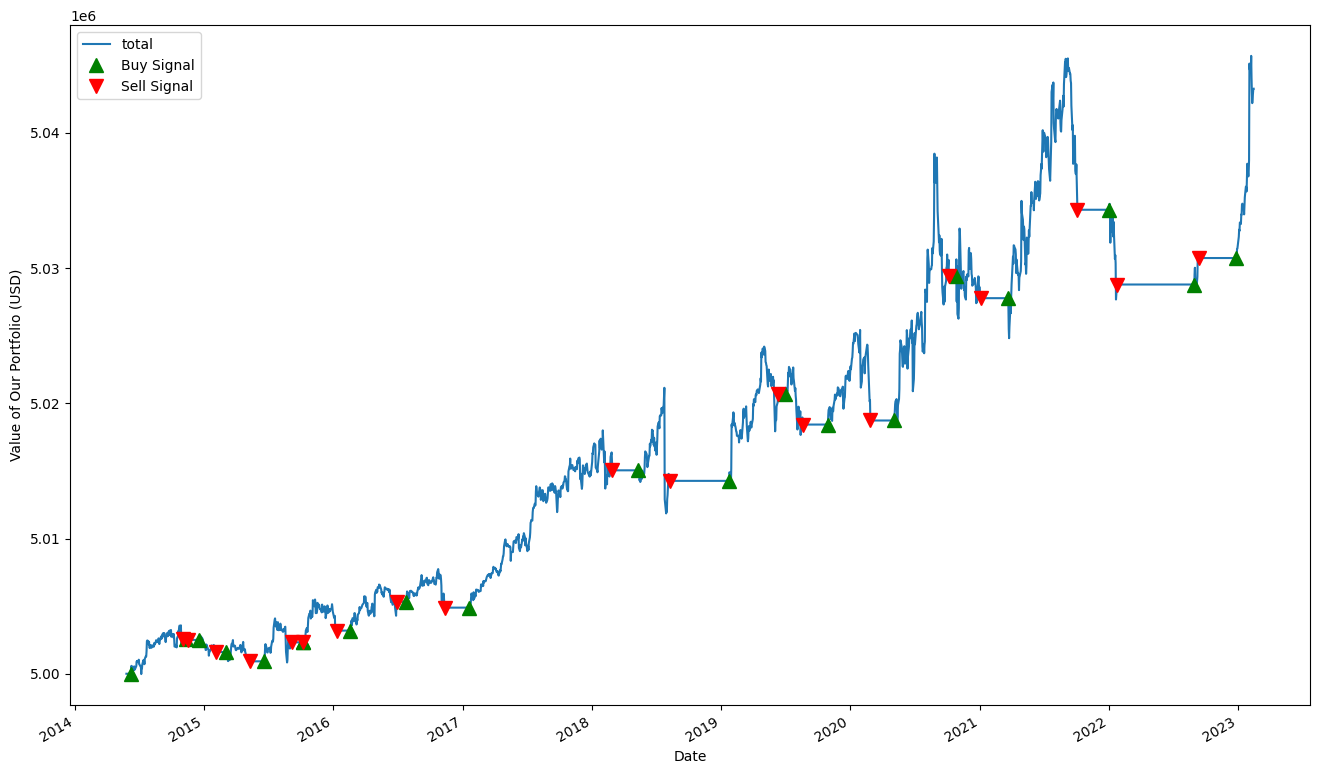

In [134]:
plot_portfolio(SMA_portfolio)

#### Plot

In [23]:
def plot_portfolio_single_stock(portfolio_df):
    # Create the figure and subplot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the total portfolio value
    portfolio_df["total"].plot(ax=ax, color="grey", lw=0.80, label="Portfolio")

    # Plot buy signals (green triangles)
    ax.plot(
        portfolio_df.loc[portfolio_df["mPositions"] == 1.0].index,
        portfolio_df["total"][portfolio_df["mPositions"] == 1.0],
        "^",
        color="green",
        markersize=10,
        label="Buy Signal",
    )

    # Plot sell signals (red triangles)
    ax.plot(
        portfolio_df.loc[portfolio_df["mPositions"] == -1.0].index,
        portfolio_df["total"][portfolio_df["mPositions"] == -1.0],
        "v",
        color="red",
        markersize=10,
        label="Sell Signal",
    )

    ax.set_title("Portfolio")
    ax.set_ylabel("Value of Portfolio (USD)")
    ax.legend()
    plt.tight_layout()
    plt.show()


In [24]:
# plot_portfolio(SMA_portfolio)

### Cumulative returns

In [20]:
def plot_cumulative_returns(stock_data_df):
    # Calculate cumulative log returns and strategy returns
    cumulative_returns = stock_data_df[["cumulative_returns", "cumulative_strategy_returns"]]

    # Create the figure and subplot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the cumulative returns
    cumulative_returns.plot(ax=ax, lw=1.5)
    ax.set_title("Cumulative Returns")
    ax.set_ylabel("Cumulative Returns")
    ax.legend(["Returns", "Strategy Returns"])

    plt.tight_layout()
    plt.show()


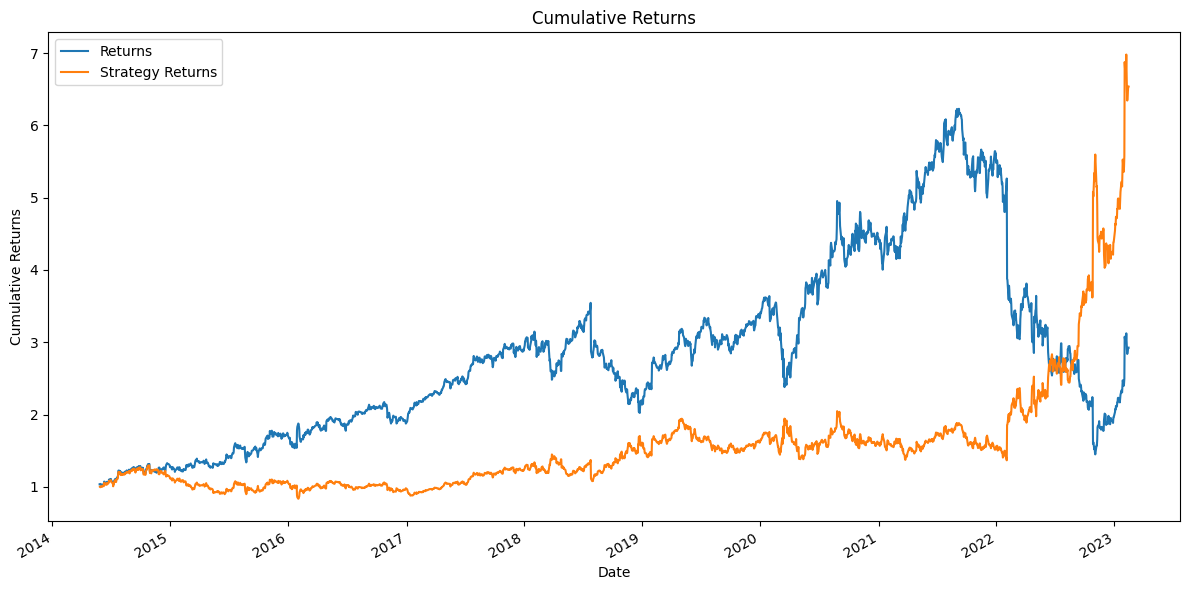

In [26]:
plot_cumulative_returns(SMA)

In [27]:
def capital(stock_data,capital):
    total = capital*stock_data["cumulative_strategy_returns"][-1]
    return total

In [28]:
capital(SMA,300000)

1961342.2752930205

### Drawdown

In [29]:
calculate_drawdown_periods(SMA)

{2: -0.02142850159167442,
 3: -0.014787446324279974,
 4: -0.012701557919334694,
 14: -0.06390406072393129,
 17: -0.0778724570552286,
 25: -0.03763800690470831,
 7: -0.09117003269945378,
 12: -0.05961238640867961,
 23: -0.08109822353063934,
 1168: -0.35601726465173544,
 15: -0.05672398951043345,
 6: -0.021157917223478595,
 50: -0.11139880322538998,
 213: -0.25529650193240694,
 32: -0.0928211293356308,
 71: -0.17315380491916,
 20: -0.07440730379997273,
 5: -0.01435612995990454,
 318: -0.2563801213287079,
 163: -0.28921274487151427,
 540: -0.33204192119117937,
 39: -0.20206077485212715,
 47: -0.21691063927092202,
 70: -0.14915102002802527,
 8: -0.0412433919874563,
 10: -0.050914530631956945,
 13: -0.07817608028535761,
 91: -0.2800226317908576}

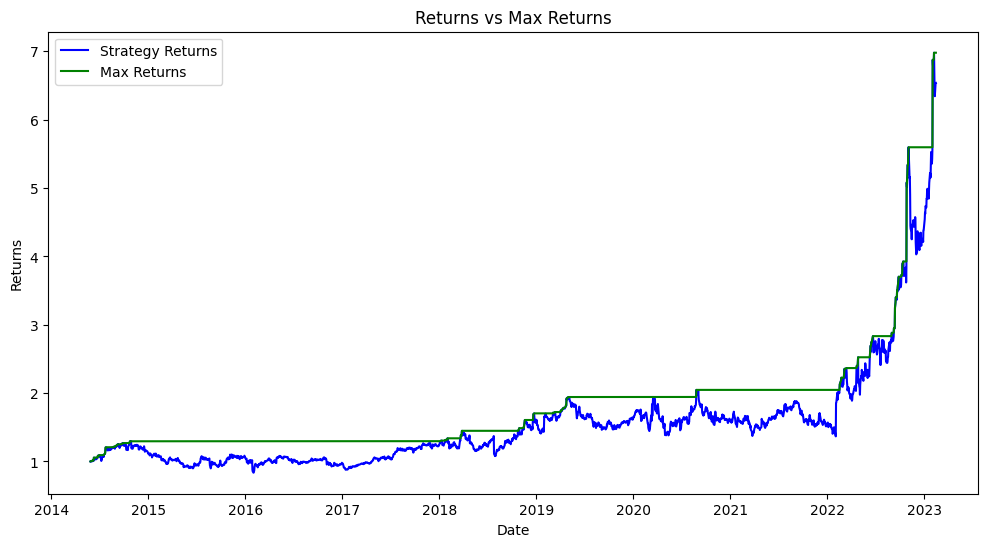

In [30]:
plot_returns_and_max_returns(SMA)

## Time-Series Momentum Strategy

In [2]:
stock = ["QQQ"]
start=datetime.datetime(2013, 9, 9)
end=datetime.datetime(2023, 9, 8)

### Signals

In [22]:
def timeseries_momentum_strategy(stock_symbol, start_date, end_date):
    # Download stock data
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

    stock_data["adj"] = stock_data["Adj Close"]

    # Calculate log returns
    stock_data["log_returns"] = np.log(stock_data["Close"] / stock_data["Close"].shift(1))

    # Calculate positions (sign of log returns)
    stock_data["Positions"] = np.sign(stock_data["log_returns"])

    # Position Marker
    stock_data["mPositions"] = np.sign(stock_data["Positions"].diff())

    # Calculate strategy returns
    stock_data["strategy_returns"] = stock_data["Positions"].shift(1) * stock_data["log_returns"]

    # Calculate cumulative returns
    stock_data["cumulative_returns"] = stock_data["log_returns"].dropna().cumsum().apply(np.exp)

    # Calculate cumulative strategy returns
    stock_data["cumulative_strategy_returns"] = stock_data["strategy_returns"].dropna().cumsum().apply(np.exp)

    # Calculate Max Gross Performance
    stock_data["max_gross_performance"] = stock_data["cumulative_strategy_returns"].cummax()

    return stock_data

In [23]:
ts = timeseries_momentum_strategy(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [28]:
ts["Positions"].value_counts()

Positions
 1.0    1396
-1.0    1113
 0.0       7
Name: count, dtype: int64

### Plots

In [25]:
def plot_signals(signals_df):
    # Create the figure and subplot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the closing price in gray
    signals_df["Adj Close"].plot(ax=ax, color="grey", lw=0.80, label="Close Price")

    # Plot buy signals (green triangles)
    ax.plot(
        signals_df.loc[signals_df.mPositions == 1.0].index,
        signals_df.adj[signals_df.mPositions == 1.0],
        "^",
        color="green",
        markersize=12,
        label="Buy Signal",
    )

    # Plot sell signals (red triangles)
    ax.plot(
        signals_df.loc[signals_df.mPositions == -1.0].index,
        signals_df.adj[signals_df.mPositions == -1.0],
        "v",
        color="red",
        markersize=12,
        label="Sell Signal",
    )

    ax.set_title("Moving Average Crossover Strategy")
    ax.legend()
    plt.tight_layout()
    plt.show()


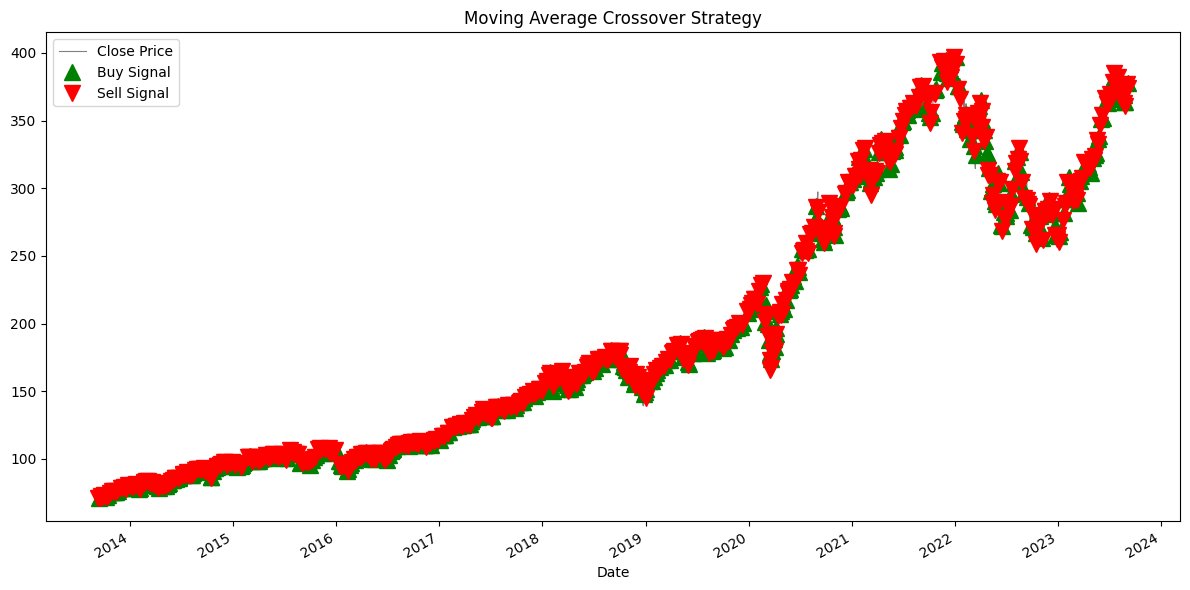

In [26]:
plot_signals(ts)

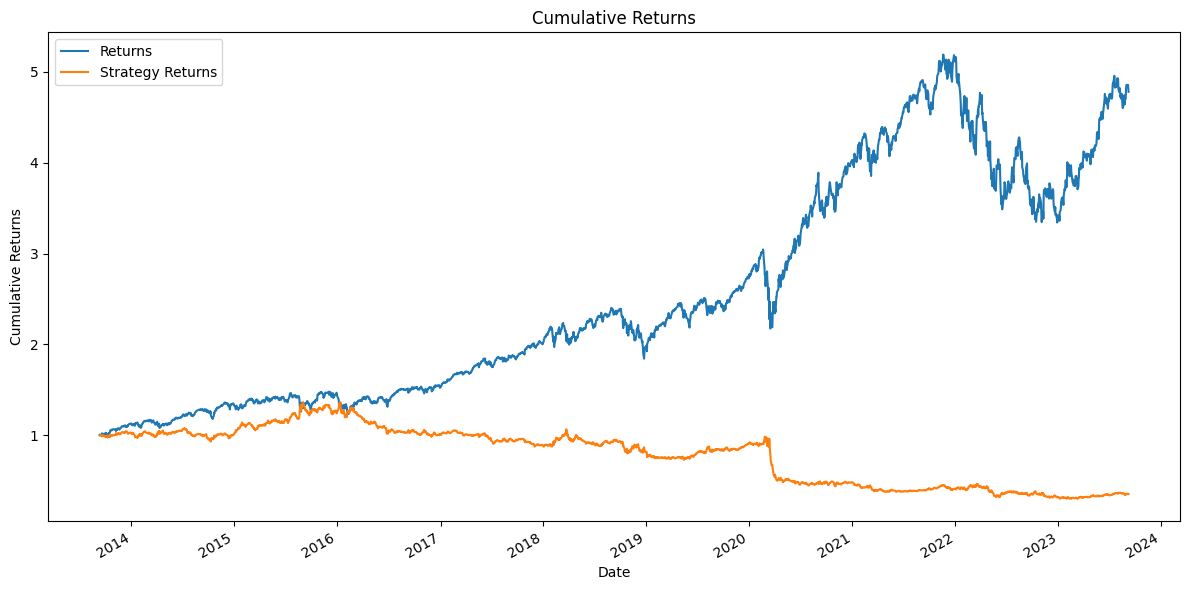

In [34]:
plot_cumulative_returns(ts)

## Mean Reversion Strategy

In [35]:
stock = ["GS"]
start=datetime.datetime(2013, 11, 1)
end=datetime.datetime(2021, 11, 1)

Position 1: Buy when you believe the price will go up (mean reversion prices will always trend back towards the mean).

Position -1: Sell when you believe the price will go down (mean reversion prices will always trend back towards the mean).

Position 0: Market-neutral stance price is fluctuating about the mean; we are unable to tell whether the movement is actually up or down.

### Signal

In [64]:
def mean_reversion_strategy(stock_symbol, SMA, start_date, end_date):
    # Download stock data
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

    # Calculate log returns
    stock_data["log_returns"] = np.log(stock_data["Adj Close"] / stock_data["Adj Close"].shift(1))

    # SMA
    stock_data["SMA"] = stock_data["Adj Close"].rolling(window=SMA).mean()

    # Distance
    stock_data["distance"] = stock_data["Adj Close"] - stock_data["SMA"]

    # Threshold
    stock_data["PSTD"] = stock_data["SMA"] + 2 * (stock_data["Adj Close"].rolling(SMA).std())
    stock_data["NSTD"] = stock_data["SMA"] - 2 * (stock_data["Adj Close"].rolling(SMA).std())

    # Positions
    conditions = [
        stock_data["distance"] >= stock_data["PSTD"] - stock_data["SMA"],
        stock_data["distance"] * stock_data["distance"].shift(1) < 0,
        stock_data["distance"] <= stock_data["NSTD"] - stock_data["SMA"],
    ]
    
    choices = [-1, 0, 1]
    stock_data["Positions"] = np.select(conditions, choices, np.nan)
    stock_data["Positions"] = stock_data["Positions"].ffill()
    stock_data["Positions"] = stock_data["Positions"].fillna(0)

    # Position Marker
    stock_data["mPositions"] = stock_data["Positions"].diff()

    # Calculate strategy returns
    stock_data["strategy_returns"] = stock_data["Positions"].shift(1) * stock_data["log_returns"]

    # Calculate cumulative returns
    stock_data["cumulative_returns"] = stock_data["log_returns"].dropna().cumsum().apply(np.exp)

    # Calculate cumulative strategy returns
    stock_data["cumulative_strategy_returns"] = (
        stock_data["strategy_returns"].dropna().cumsum().apply(np.exp)
    )

    # Calculate Max Gross Performance
    stock_data["max_gross_performance"] = stock_data["cumulative_strategy_returns"].cummax()

    return stock_data


In [43]:
MR = mean_reversion_strategy(stock, 42, start, end)

[*********************100%%**********************]  1 of 1 completed


#### Fixed Threshold

In [28]:
stock = ["WMT"]
start=datetime.datetime(2014, 10, 13)
end=datetime.datetime(2022, 9, 14)

In [39]:
# stock = ["GDX"]
# start=datetime.datetime(2013, 3, 1)
# end=datetime.datetime(2023, 2, 28)

In [62]:
def mean_reversion_strategy_fixed(stock_symbol, SMA, start_date, end_date):
    # Download stock data
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

    # Calculate log returns
    stock_data["log_returns"] = np.log(stock_data["Adj Close"] / stock_data["Adj Close"].shift(1))

    # SMA
    stock_data["SMA"] = stock_data["Adj Close"].rolling(window=SMA).mean()

    # Distance
    stock_data["distance"] = stock_data["Adj Close"] - stock_data["SMA"]

    # Threshold
    threshold = 4

    # Positions
    stock_data["Positions"] =\
    (
        np
        .where(stock_data["distance"] > threshold,
               -1, np.nan)
    )

    stock_data["Positions"] =\
    (
        np
        .where(stock_data["distance"] < -threshold,
               1, stock_data["Positions"])
    )

    stock_data["Positions"] =\
    (
        np
        .where(stock_data["distance"] * stock_data["distance"].shift(1) < 0,
               0, stock_data["Positions"])
    )

    # Position Marker
    stock_data["mPositions"] = stock_data["Positions"].ffill()
    stock_data["mPositions"] = stock_data["Positions"].fillna(0)

    # Calculate strategy returns
    stock_data["strategy_returns"] = stock_data["mPositions"].shift(1) * stock_data["log_returns"]

    # Calculate cumulative returns
    stock_data["cumulative_returns"] = stock_data["log_returns"].dropna().cumsum().apply(np.exp)

    # Calculate cumulative strategy returns
    stock_data["cumulative_strategy_returns"] = (
        stock_data["strategy_returns"].dropna().cumsum().apply(np.exp)
    )

    stock_data["cumulative_strategy_returns"] = stock_data["cumulative_strategy_returns"].ffill()

    # Calculate Max Gross Performance
    stock_data["max_gross_performance"] = stock_data["cumulative_strategy_returns"].cummax()

    return stock_data

In [58]:
fixed_mr = mean_reversion_strategy_fixed(stock, 41, start, end)

[*********************100%%**********************]  1 of 1 completed


In [60]:
fixed_mr["Positions"].value_counts()

Positions
-1.0    361
 1.0    184
 0.0    144
Name: count, dtype: int64

In [61]:
fixed_mr["mPositions"].value_counts()

mPositions
 0.0    945
-1.0    667
 1.0    322
Name: count, dtype: int64

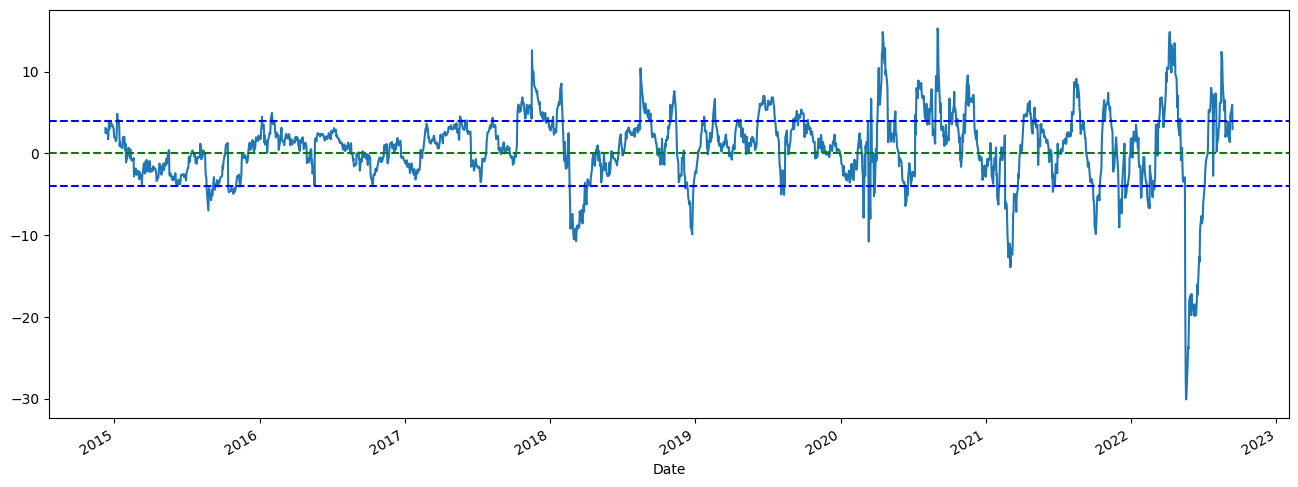

In [38]:
threshold = 4

(fixed_mr["distance"]
 .dropna()
 .plot(figsize = [16, 6]
      )
)

plt.axhline(threshold, color = "blue", ls = "--")

plt.axhline(0, color = "green", ls = "--")

plt.axhline(-threshold, color = "blue", ls = "--")

<Axes: xlabel='Date'>

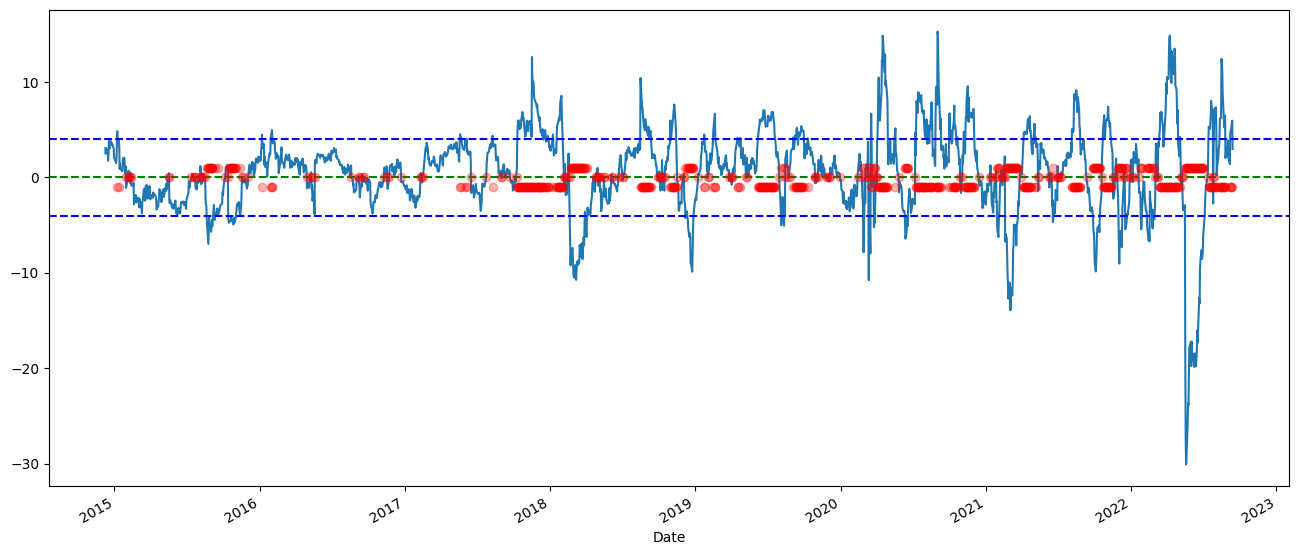

In [49]:
(fixed_mr["distance"]
 .dropna()
 .plot(figsize = [16, 6]
      )
)

plt.axhline(threshold, color = "blue", ls = "--")

plt.axhline(0, color = "green", ls = "--")

plt.axhline(-threshold, color = "blue", ls = "--")

(
    fixed_mr["Positions"]
    .dropna()
    .plot(figsize = [16 , 7],
          color = "red",
          style = "o",
          alpha = 0.30)
)

<Axes: xlabel='Date'>

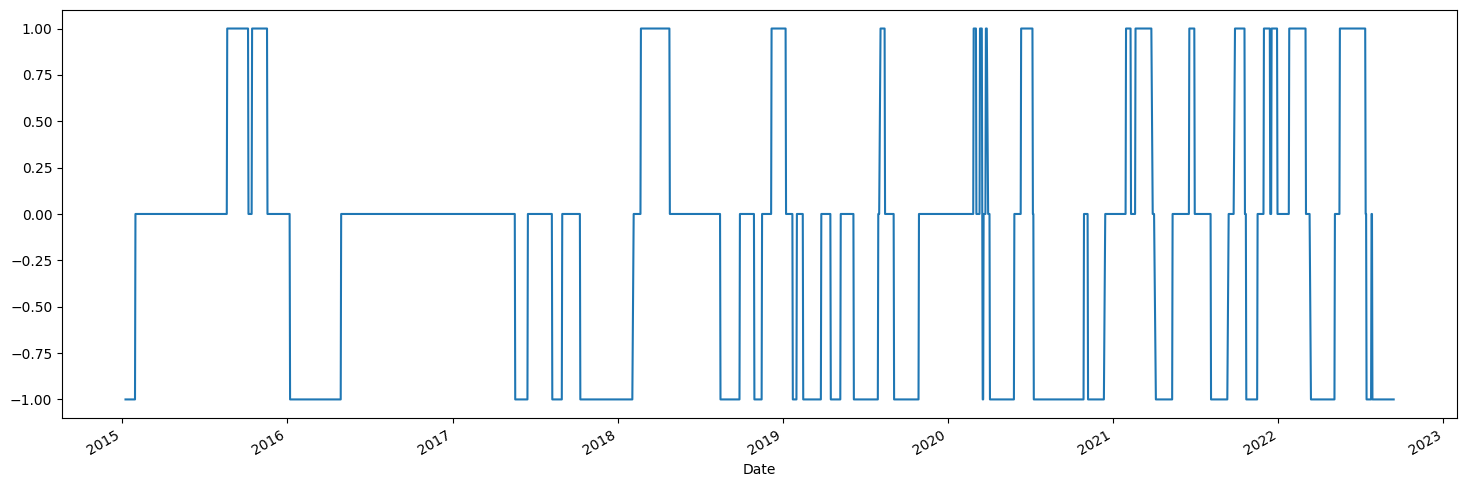

In [50]:
(
    fixed_mr["mPositions"]
    .iloc[22: ]
    .plot(figsize = [18, 6],
          ylim = [-1.10, 1.10]
         )
)

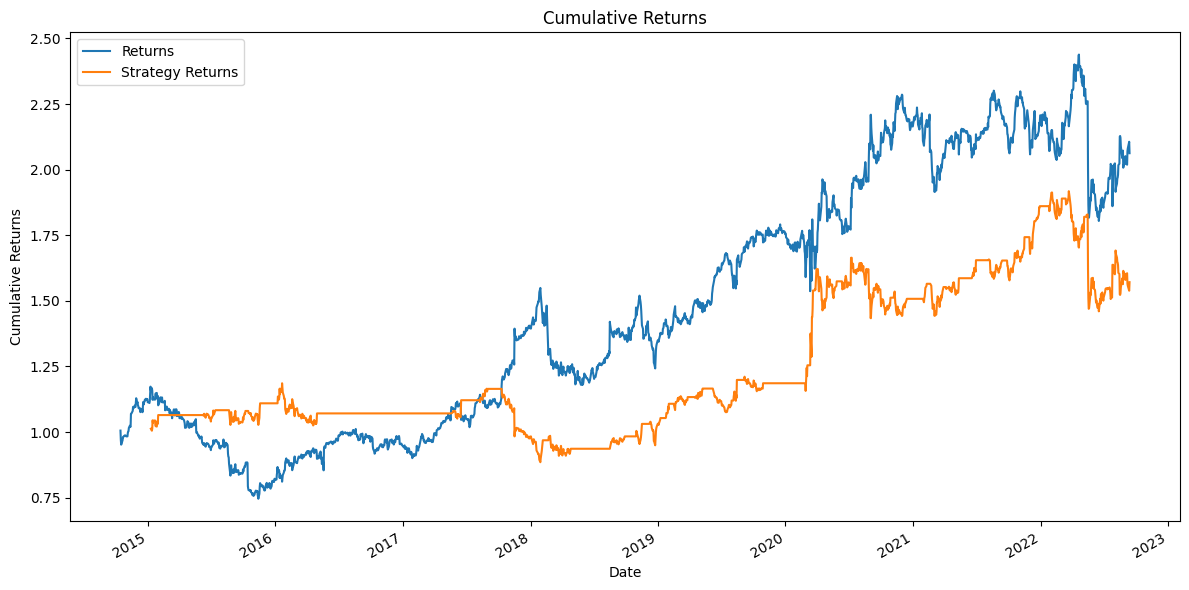

In [59]:
plot_cumulative_returns(fixed_mr)

### Plot

In [45]:
def plot_signals_for_mr(signal_df):
    # Create the figure and subplot
    fig, ax = plt.subplots(figsize=(16, 10))

    # Plot the closing price in gray
    signal_df["Adj Close"].plot(ax=ax, color="grey", lw=0.80, label="Adj Close")

    # Plot short and long moving averages
    signal_df[["SMA", "PSTD", "NSTD"]].plot(
        ax=ax, style=["--", "--", "--"], lw=0.80, label=["SMA", "PTSD", "NTSD"]
    )

    # Plot buy signals (green triangles)
    ax.plot(
        signal_df.loc[signal_df.mPositions == 1.0].index,
        signal_df[signal_df.mPositions == 1.0]['Adj Close'],
        "^",
        color="green",
        markersize=12,
        label="Buy Signal",
    )

    # Plot sell signals (red triangles)
    ax.plot(
        signal_df.loc[signal_df.mPositions == -1.0].index,
        signal_df[signal_df.mPositions == -1.0]['Adj Close'],
        "v",
        color="red",
        markersize=12,
        label="Sell Signal",
    )

    ax.set_title("Moving Average Crossover Strategy")
    ax.legend()
    plt.tight_layout()
    plt.show()


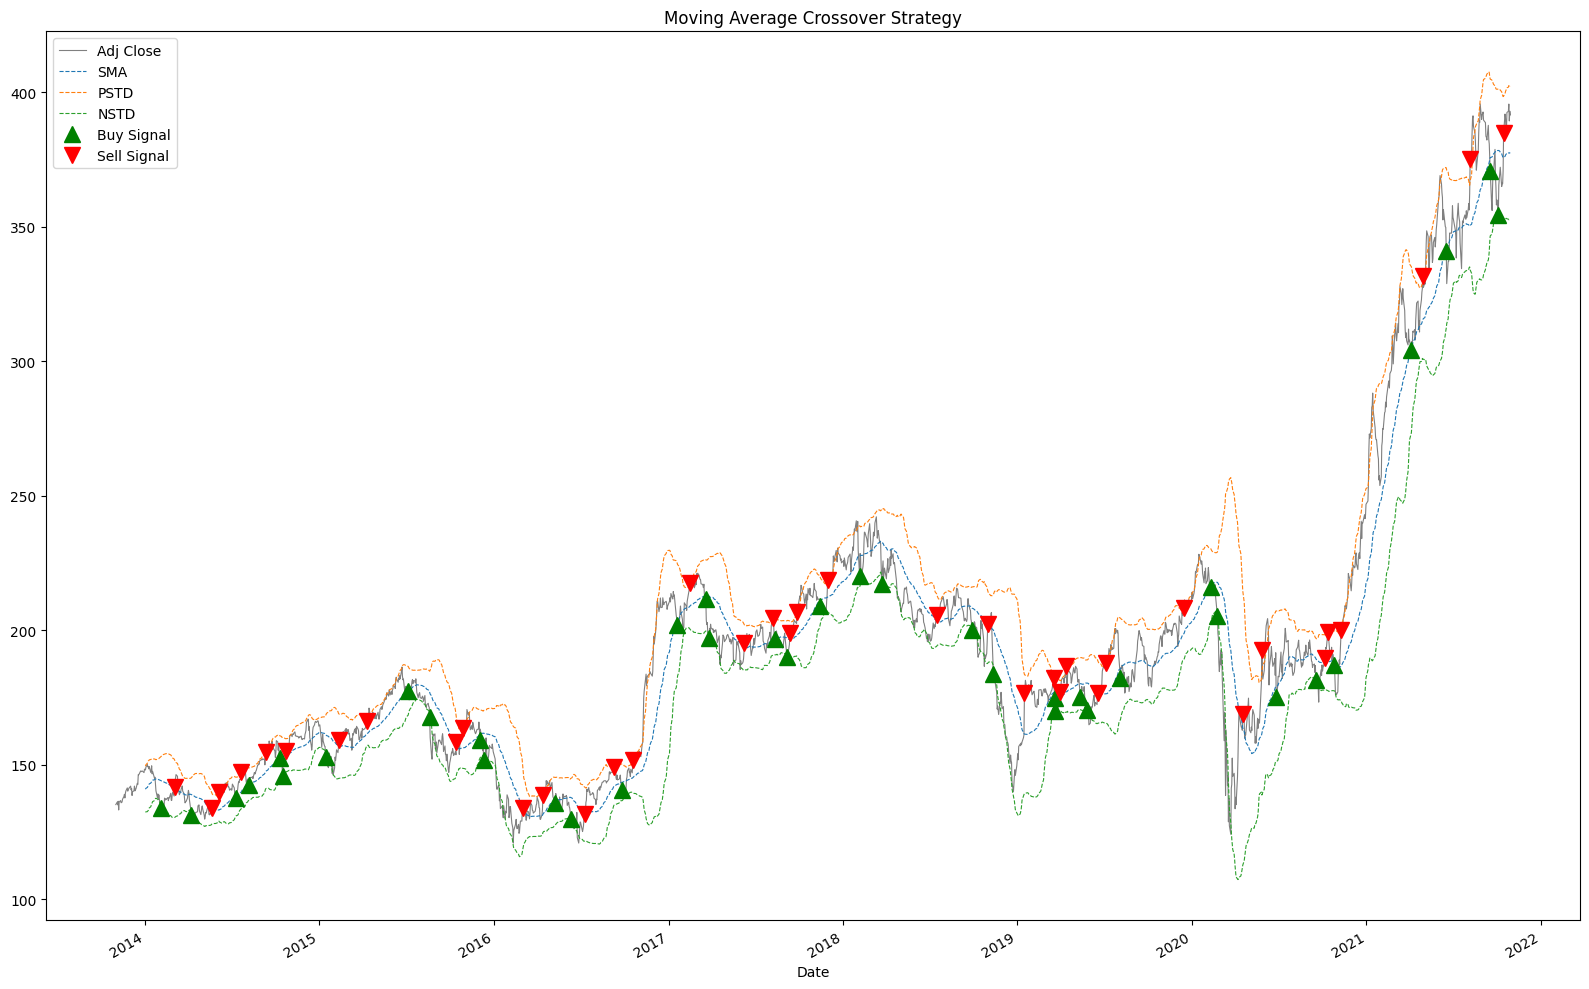

In [46]:
plot_signals_for_mr(MR)

### Cumulative returns

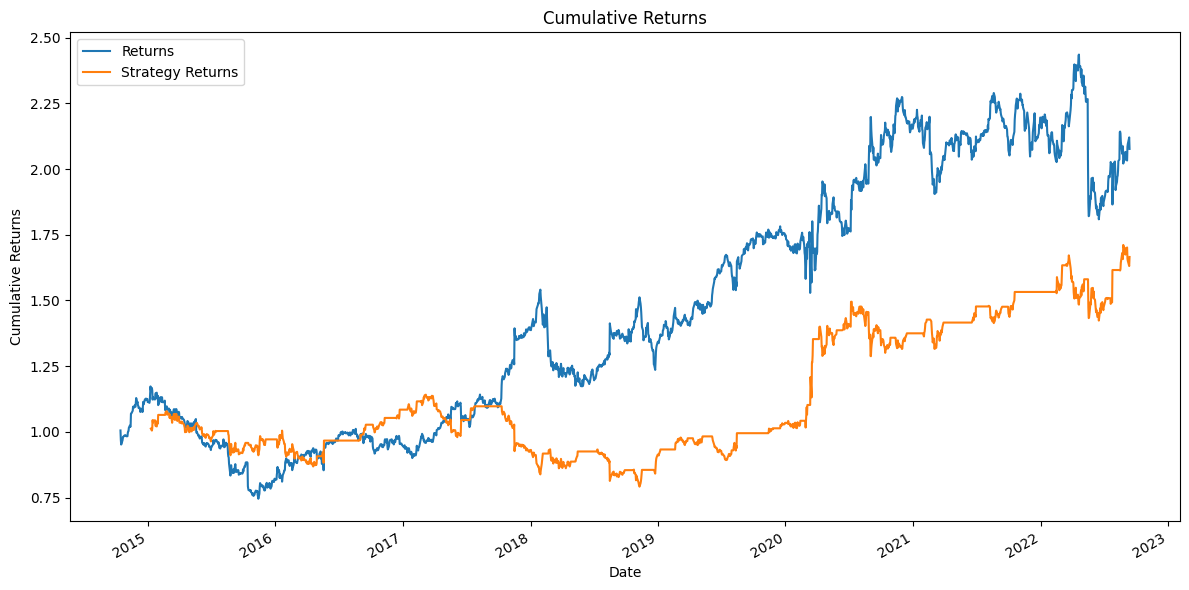

In [44]:
plot_cumulative_returns(MR)

In [48]:
calculate_sharpe_ratio(MR)

-0.17764283741887577

In [49]:
calculate_cagr(MR)

0.14227401251031835

## Lag returns strategy

In [2]:
stock = ["GE"]
start=datetime.datetime(2011, 8, 1)
end=datetime.datetime(2020, 8, 1)

### Function

In [3]:
def lag_strategy(stock_symbol,start_date, end_date,lags):
    # Download stock data
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

    # Calculate log returns
    stock_data["log_returns"] = np.log(stock_data["Adj Close"] / stock_data["Adj Close"].shift(1))

    def CreateLags(dataframe, LAGS):
        #Empty List to store column names
        COLS = []
    
        #Empty Dataframe
        lag_df = \
            pd.DataFrame(index = dataframe.index)
    
        #Fetch Returns from original df
        lag_df["log_returns"] = \
            dataframe["log_returns"]
    
        #Create lags
        for i in range(1,LAGS+1):
            COL = f'Lag_{i}'
        
            lag_df[COL] = \
                lag_df["log_returns"].shift(i)
        
            COLS.append(COL)
        
        return lag_df.dropna(), COLS

    lag, cols = CreateLags(stock_data,lags)

    def OLSRegression(dataframe,columns):
    
        # Regress 
        OLS =\
            np \
            .linalg \
            .lstsq(dataframe[columns],  
                   dataframe["log_returns"],
                   rcond = None)[0]
        
        # Calculate the prediction by taking dot product with coefficients
        dataframe["PREDICTION"] =\
            np.dot(dataframe[columns], 
                   OLS)
        return dataframe
    
    lag = OLSRegression(lag,cols)

    return lag

In [4]:
LS = lag_strategy(stock,start, end,3)

[*********************100%%**********************]  1 of 1 completed


In [5]:
LS10 = lag_strategy(stock,start, end,10)

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

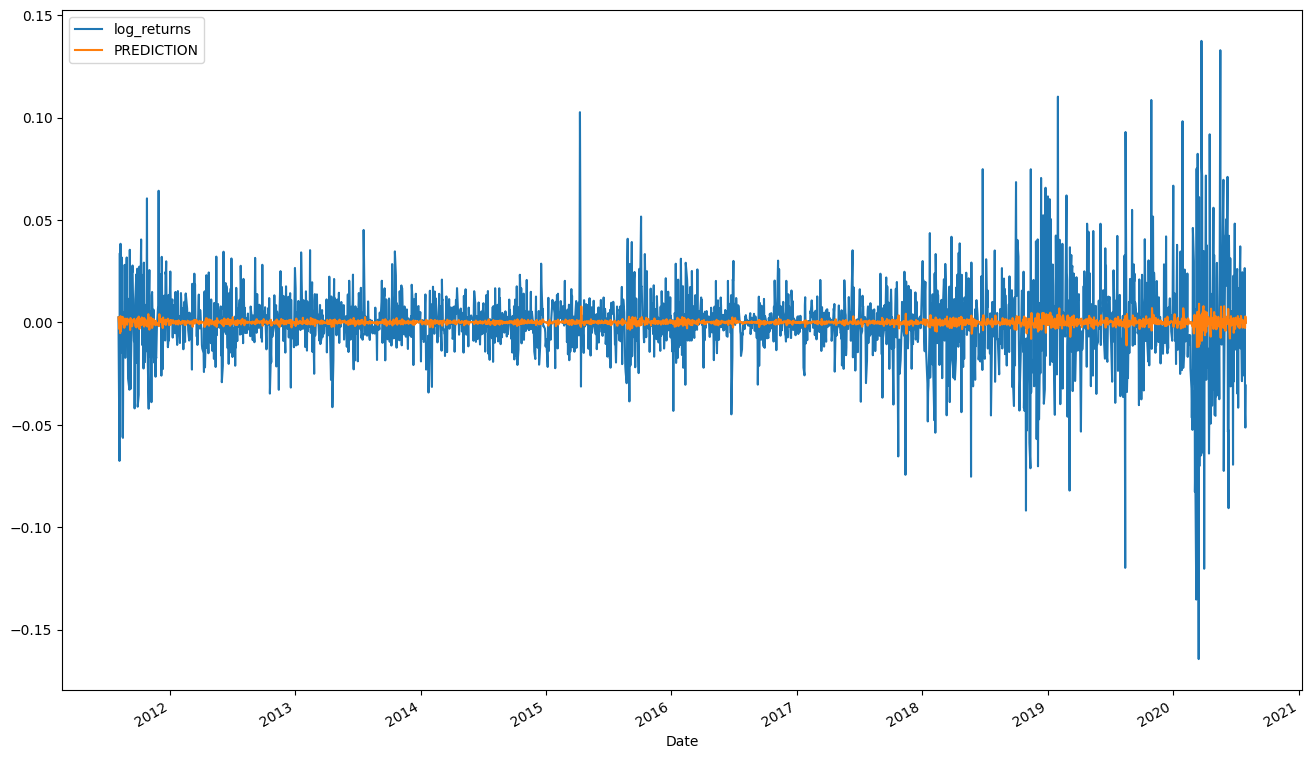

In [6]:
LS[["log_returns","PREDICTION"]].plot(figsize=[16,10])

### Accuracy

In [7]:
def calculate_accuracy_B(stock_data):

    returns_series = stock_data["log_returns"]
    predictions_series = stock_data["PREDICTION"]
    # Correct predictions
    correct_positive = (returns_series > 0) & (predictions_series > 0)
    correct_negative = (returns_series < 0) & (predictions_series < 0)
    correct_zero = (returns_series == 0) & (predictions_series == 0)

    total_correct = correct_positive.sum() + correct_negative.sum() + correct_zero.sum()

    # Incorrect predictions
    incorrect_positive_return = (returns_series > 0) & (predictions_series <= 0)
    incorrect_negative_return = (returns_series < 0) & (predictions_series >= 0)
    incorrect_zero_return = (returns_series == 0) & (predictions_series != 0)

    total_incorrect =\
    (
        incorrect_positive_return.sum()
        + incorrect_negative_return.sum()
        + incorrect_zero_return.sum()
    )

    # Calculate Hit
    accuracy_B = total_correct / (total_correct + total_incorrect)
    
    return accuracy_B

In [8]:
calculate_accuracy_B(LS)

0.502210433244916

In [9]:
calculate_accuracy_B(LS10)

0.503769401330377

### Sharpe Ratio

In [10]:
def getSharpe(stock_data):
    stock_data['DIRECTION'] = np.sign(stock_data['PREDICTION'])
    stock_data['strategy_returns'] = stock_data['DIRECTION'] * stock_data['log_returns']
    Sharpe = np.sqrt(253) * (stock_data["strategy_returns"].mean() / stock_data["strategy_returns"].std())

    return Sharpe

In [11]:
getSharpe(LS10)

0.29914279508717545

### Backtesting

In [12]:
LS

,log_returns,Lag_1,Lag_2,Lag_3,PREDICTION
Date,,,,,
2011-08-05,0.002426,-0.058944,0.014994,-0.043213,0.002426
2011-08-08,-0.067653,0.002426,-0.058944,0.014994,-0.003362
2011-08-09,0.033772,-0.067653,0.002426,-0.058944,0.001749
2011-08-10,-0.056054,0.033772,-0.067653,0.002426,-0.005282
2011-08-11,0.038354,-0.056054,0.033772,-0.067653,0.003034
...,...,...,...,...,...
2020-07-27,-0.022108,-0.025901,-0.002837,0.002837,0.000863
2020-07-28,0.026472,-0.022108,-0.025901,-0.002837,-0.000751
2020-07-29,-0.044518,0.026472,-0.022108,-0.025901,-0.002753


In [15]:
LS["STRATEGY"] = np.sign(LS["PREDICTION"]) * LS["log_returns"]

<Axes: xlabel='Date'>

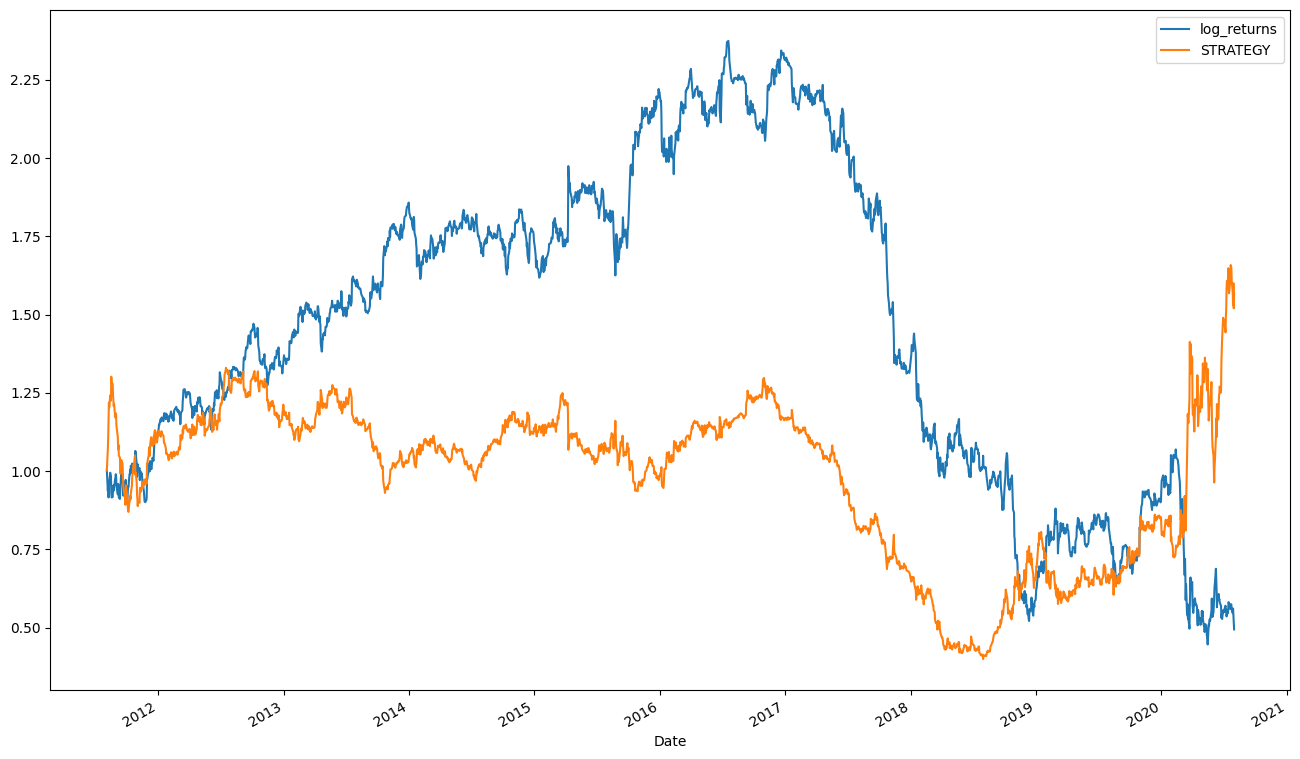

In [18]:
LS \
    [["log_returns", "STRATEGY"]] \
    .dropna() \
    .cumsum() \
    .apply(np.exp) \
    .plot(figsize = (16,10)
         )

## ML

In [24]:
stock = ["GLD"]
start=datetime.datetime(2010, 10, 1)
end=datetime.datetime(2022, 10, 19)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def ML_strategy(stock_symbol, start_date, end_date, lags=3):
    # Download stock data from Yahoo Finance
    data = pdr.get_data_yahoo(stock_symbol, start=start_date, end=end_date)

    # Calculate daily returns
    data["RETURN"] = np.log(data["Close"] / data["Close"].shift(1))
    data.dropna(inplace=True)

    # Create lagged columns for the logistic regression model
    cols = []
    for lag in range(1, lags + 1):
        col = "lag_{}".format(lag)
        data[col] = data["RETURN"].shift(lag)
        cols.append(col)

    data.dropna(inplace = True)

    # Train the logistic regression model
    X = data[cols]
    y = np.sign(data["RETURN"])
    model = LogisticRegression(solver="lbfgs", C=1e7, multi_class="auto", max_iter=1000)
    model.fit(X, y)

    # Make predictions
    data["PREDICTION"] = model.predict(data[cols])

    # Calculate strategy returns
    data["STRATEGY"] = data["PREDICTION"] * data["RETURN"]

    # Calculate cumulative returns
    daily_returns = data["RETURN"].apply(np.exp)
    strategy_returns = data["STRATEGY"].apply(np.exp)

    # Calculate accuracy
    accuracy = np.sign(data["RETURN"].iloc[lags:] * data["PREDICTION"].iloc[lags:]).value_counts()
    accuracy_scoree = accuracy_score(data["PREDICTION"], np.sign(data["RETURN"]))

    # Print results
    print("Accuracy:")
    print(accuracy)

    print("Accuracy Score:")
    print(accuracy_scoree)

    return data[["RETURN", "PREDICTION", "STRATEGY"]]


In [46]:
ML = ML_strategy(stock, start, end, lags=3)

[*********************100%%**********************]  1 of 1 completed
Accuracy:
 1.0    1571
-1.0    1444
 0.0      11
Name: count, dtype: int64
Accuracy Score:
0.51931330472103


<Axes: xlabel='Date'>

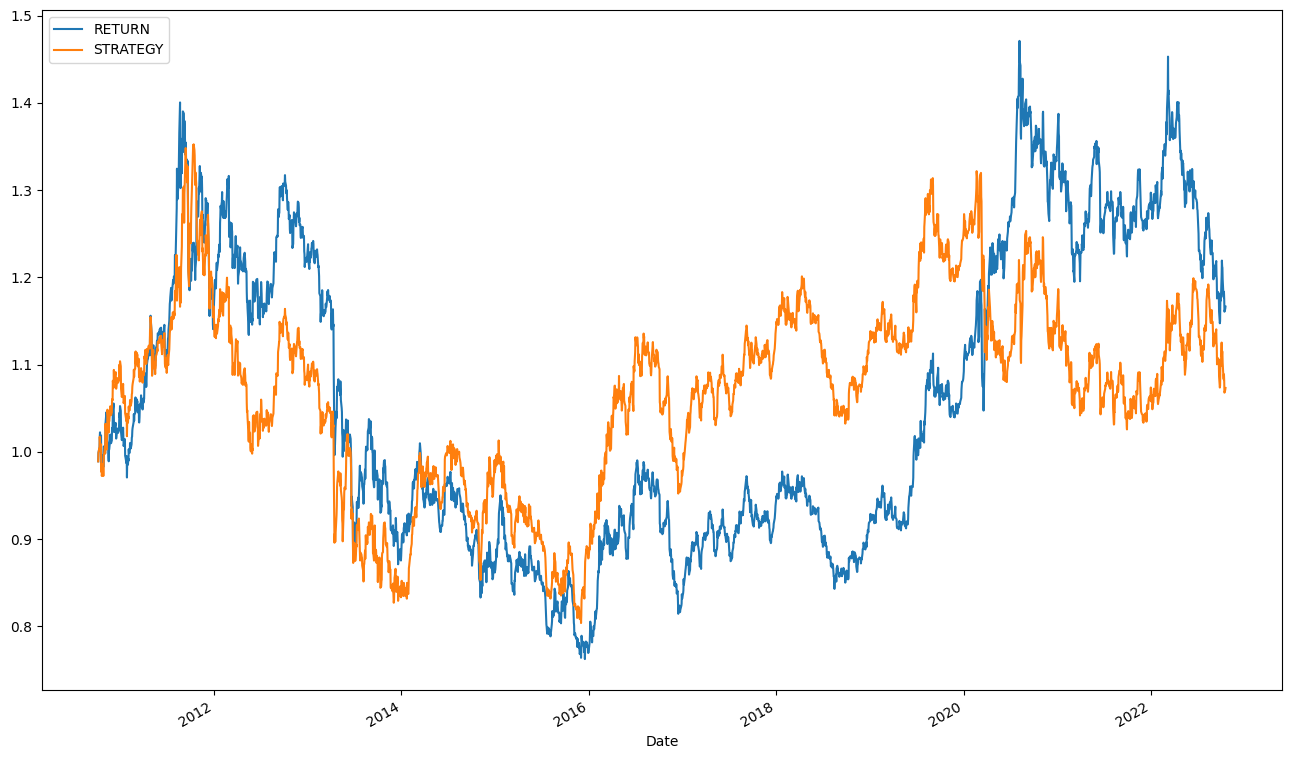

In [43]:
ML[["RETURN", "STRATEGY"]
    ].cumsum().apply(np.exp).plot(figsize = (16, 10)
                                 )

## MACD

In [74]:
stock = ["AAPL"]
start=datetime.datetime(2015, 1, 1)
end=datetime.datetime(2017, 12, 31)

### Signals

In [68]:
def MACD_strategy(stock_data, start_date, end_date):

    stock_data = yf.download(stock_data, start=start_date, end=end_date)

    # Calculate the 12-day and 26-day exponential moving averages
    stock_data["12day"] = stock_data["Adj Close"].ewm(span=12, min_periods=12).mean()
    stock_data["26day"] = stock_data["Adj Close"].ewm(span=26, min_periods=26).mean()

    # Calculate the MACD line
    stock_data["MACD"] = stock_data["12day"] - stock_data["26day"]

    # Calculate the 9-day exponential moving average of the MACD line (Signal Line)
    stock_data["Signal_Line"] = stock_data["MACD"].ewm(span=9, min_periods=9).mean()

    # Generate buy/sell signals based on MACD and Signal Line
    stock_data["Signal"] = np.where(stock_data["MACD"] > stock_data["Signal_Line"], 1, 0)

    # Signal Marker
    stock_data["mSignal"] = stock_data["Signal"].diff()

    stock_data["Position"] = np.where(stock_data["MACD"] > stock_data["Signal_Line"], 1, -1)

    stock_data = stock_data.dropna()

    # Calculate log returns
    stock_data["log_returns"] = np.log(stock_data["Adj Close"] / stock_data["Adj Close"].shift(1))

    # Calculate Strategy returns
    stock_data["strategy_returns"] = stock_data["Position"].shift(1) * stock_data["log_returns"]

    # Calculate cumulative returns
    stock_data["cumulative_returns"] = stock_data["log_returns"].dropna().cumsum().apply(np.exp)

    # Calculate cumulative strategy returns
    stock_data["cumulative_strategy_returns"] = stock_data["strategy_returns"].dropna().cumsum().apply(np.exp)

    # Calculate Max Gross Performance
    stock_data["max_gross_performance"] = stock_data["cumulative_returns"].cummax()

    # Calculate Max Gross Strategy Performance
    stock_data["max_gross_strategy_performance"] = stock_data["cumulative_strategy_returns"].cummax()

    # Drop rows with NaN values
    stock_data = stock_data.dropna()

    return stock_data


In [75]:
MACD = MACD_strategy(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


### Plot

In [70]:
def plot_signals_for_MACD(stock_data):

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the MACD
    ax.plot(stock_data.index, stock_data['MACD'], label='MACD')

    # Plot the Signal Line
    ax.plot(stock_data.index, stock_data['Signal_Line'], label='Signal Line')

    # Plot buy signals (green triangles)
    ax.plot(
        stock_data.loc[stock_data.mSignal == 1.0].index,
        stock_data[stock_data.mSignal == 1.0]['MACD'],
        "^",
        color="green",
        markersize=12,
        label="Buy Signal",
    )

    # Plot sell signals (red triangles)
    ax.plot(
        stock_data.loc[stock_data.mSignal == -1.0].index,
        stock_data[stock_data.mSignal == -1.0]['MACD'],
        "v",
        color="red",
        markersize=12,
        label="Sell Signal",
    )

    # Set labels and title for the plot
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title('MACD Buy and Sell Signals')

    # Add a legend to the plot
    ax.legend()

    # Show the plot
    plt.show()


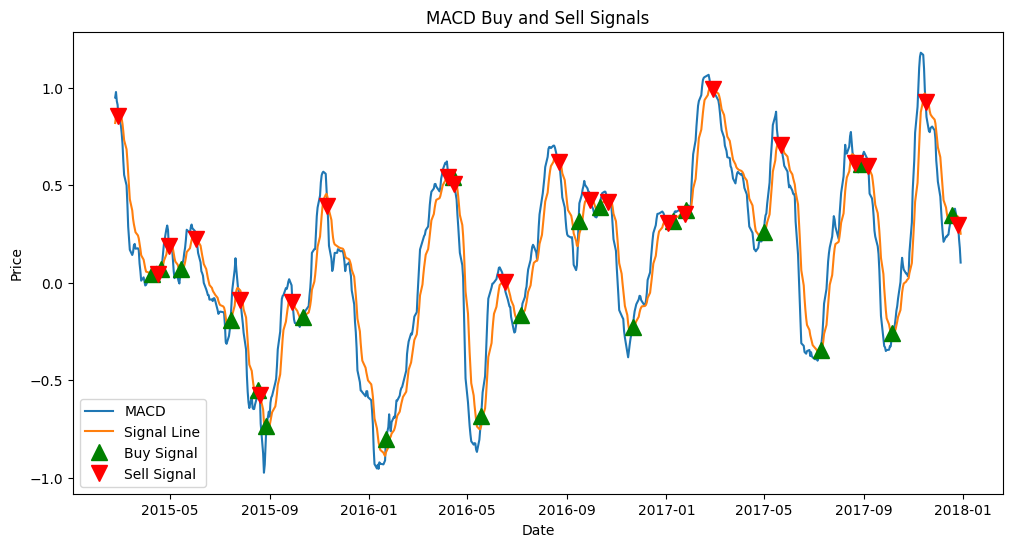

In [76]:
plot_signals_for_MACD(MACD)

### Cumulative Returns

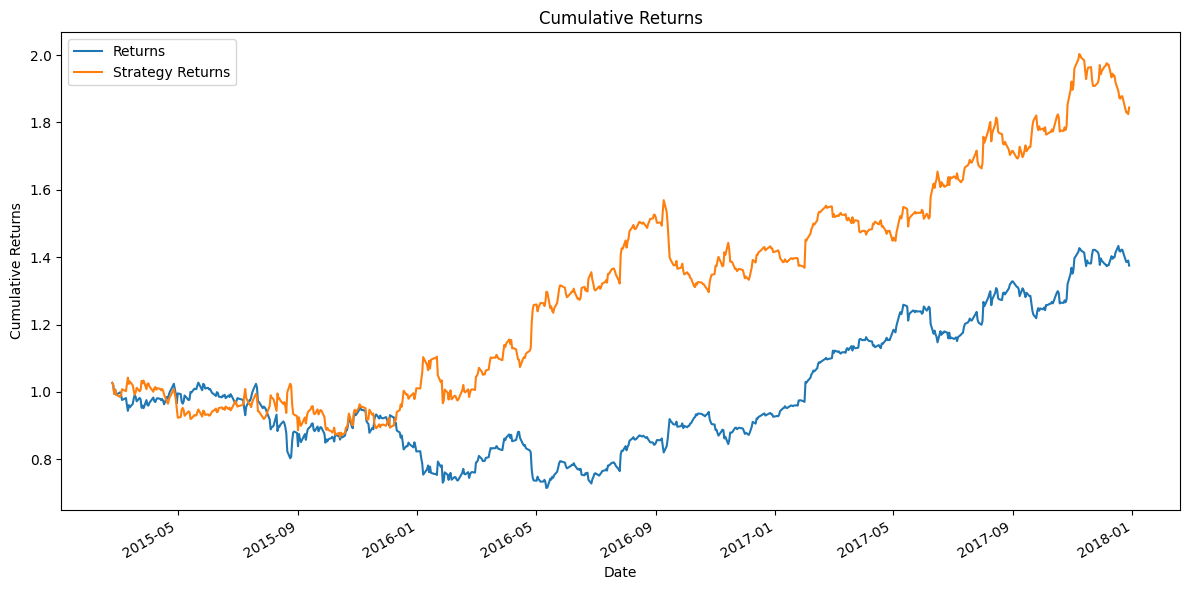

In [77]:
plot_cumulative_returns(MACD)

In [78]:
def capital(stock_data,capital):
    total = capital*stock_data["cumulative_strategy_returns"][-1]
    return total

In [79]:
capital(MACD,100000)

184440.1847915261

In [80]:
MACD

,Open,High,Low,Close,Adj Close,Volume,12day,26day,MACD,Signal_Line,Signal,mSignal,Position,log_returns,strategy_returns,cumulative_returns,cumulative_strategy_returns,max_gross_performance,max_gross_strategy_performance
Date,,,,,,,,,,,,,,,,,,,
2015-02-23,32.505001,33.250000,32.415001,33.250000,29.920282,283896400,28.361094,27.412057,0.949037,0.818434,1,0.0,1,0.026668,0.026668,1.027027,1.027027,1.027027,1.027027
2015-02-24,33.235001,33.400002,32.792500,33.042500,29.733562,276912400,28.572760,27.595509,0.977252,0.853182,1,0.0,1,-0.006260,-0.006260,1.020618,1.020618,1.027027,1.027027
2015-02-25,32.889999,32.900002,32.037498,32.197498,28.973181,298846800,28.634491,27.703840,0.930651,0.869819,1,0.0,1,-0.025906,-0.025906,0.994517,0.994517,1.027027,1.027027
2015-02-26,32.197498,32.717499,31.652500,32.605000,29.339869,365150000,28.743201,27.831903,0.911298,0.878598,1,0.0,1,0.012577,0.012577,1.007104,1.007104,1.027027,1.027027
2015-02-27,32.500000,32.642502,32.060001,32.115002,28.898951,248059200,28.767198,27.915079,0.852119,0.873058,0,-1.0,-1,-0.015142,-0.015142,0.991969,0.991969,1.027027,1.027027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,43.669998,43.855000,43.625000,43.752499,41.427502,65397600,41.087600,40.708554,0.379046,0.348635,1,0.0,1,0.000000,0.000000,1.422017,1.877546,1.433474,2.002947
2017-12-26,42.700001,42.867500,42.419998,42.642502,40.376472,132742000,40.978195,40.683955,0.294240,0.337756,0,-1.0,-1,-0.025698,-0.025698,1.385940,1.829912,1.433474,2.002947
2017-12-27,42.525002,42.695000,42.427502,42.650002,40.383583,85992800,40.886717,40.661705,0.225011,0.315207,0,0.0,-1,0.000176,-0.000176,1.386185,1.829590,1.433474,2.002947


### Drawdowns

In [69]:
calculate_drawdown_periods(MACD)

{507: -0.18166604094073047,
 4: -0.0022654165753265287,
 7: -0.030822544294863197,
 3: -0.012718984570799563,
 6: -0.03185188791972715,
 123: -0.05806944153337745,
 36: -0.012280579629841415,
 2: -0.004740212591737736,
 69: -0.0042303052571435185,
 62: -0.03747634981573922,
 5: -0.00999117599042787,
 73: -0.03313785563403904,
 51: -0.05798278174265015}

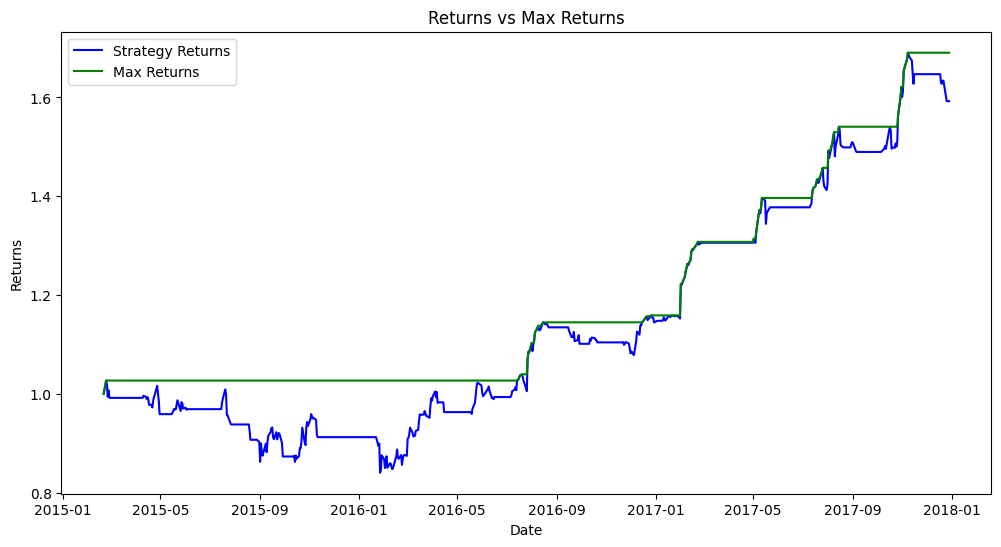

In [70]:
plot_returns_and_max_returns(MACD)

### Annual Returns

In [71]:
def annual_returns(stock_data):
    stock_data['year'] = stock_data.index.year
 
    last= stock_data.groupby('year')[['cumulative_strategy_returns']].last()
    
    #The column value is initialized to NaN 
    last['year_returns'] = np.nan
    
    #run a for loop here for calculating the annual return of each year. 
    for i in range(len(last)):
        if i == 0:
            last['year_returns'].iloc[i] = (last['cumulative_strategy_returns'].iloc[i]/1-1)*100
        else:
            last['year_returns'].iloc[i] = \
                (last['cumulative_strategy_returns'].iloc[i] / last['cumulative_strategy_returns'].iloc[i - 1] - 1)*100
    return last

In [72]:
annual_returns(MACD)

,cumulative_strategy_returns,year_returns
year,,
2015,0.912423,-8.757708
2016,1.144685,25.455487
2017,1.592530,39.123910


In [73]:
def annual_returns_sort(stock_data):
    stock_data['year'] = stock_data.index.year
 
    last= stock_data.groupby('year')[['cumulative_strategy_returns']].last()
    
    #The column value is initialized to NaN 
    last['year_returns'] = np.nan
    
    #run a for loop here for calculating the annual return of each year. 
    for i in range(len(last)):
        if i == 0:
            last['year_returns'].iloc[i] = (last['cumulative_strategy_returns'].iloc[i]/1-1)*100
        else:
            last['year_returns'].iloc[i] = \
                (last['cumulative_strategy_returns'].iloc[i] / last['cumulative_strategy_returns'].iloc[i - 1] - 1)*100
    
    average_annual_returns = last['year_returns'].mean()
    low_returns_years = last[last['year_returns'] < average_annual_returns]
    high_returns_years = last[last['year_returns'] > average_annual_returns]
        
    print(f"average annual returns is {average_annual_returns}")
    print(low_returns_years)
    print(high_returns_years)

In [74]:
annual_returns_sort(MACD)

average annual returns is 18.60722948811308
      cumulative_strategy_returns  year_returns
year                                           
2015                     0.912423     -8.757708
      cumulative_strategy_returns  year_returns
year                                           
2016                     1.144685     25.455487
2017                     1.592530     39.123910


### Sharpe

In [75]:
calculate_annual_sharpe_ratio(MACD)

1.1357518160773552

In [76]:
calculate_sharpe_ratio(MACD)

1.059885416770968

## RSI

In [77]:
stock = ["AAPL"]
start=datetime.datetime(2015, 1, 1)
end=datetime.datetime(2017, 12, 31)

### Signals

In [78]:
def RSI_strategy(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)

    # Calculate RSI

    stock_data["diff"] = stock_data["Adj Close"].diff()

    stock_data["gain"] = np.where(stock_data["diff"] > 0, stock_data["diff"], 0)
    stock_data["loss"] = np.where(stock_data["diff"] < 0, -stock_data["diff"], 0)
    stock_data["gain_av"] = stock_data["gain"].rolling(window=14).mean()
    stock_data["loss_av"] = stock_data["loss"].rolling(window=14).mean()

    stock_data["RS"] = stock_data["gain_av"] / stock_data["loss_av"]

    stock_data["RSI"] = 100 - (100 / (1 + stock_data["RS"]))

    # Calculate trading signals

    stock_data["position"] = np.nan

    long = (stock_data["RSI"].shift(1) < 30) & (stock_data["RSI"] >= 30) & (stock_data["position"].shift(1) != -1)
    short = (stock_data["RSI"].shift(1) > 70) & (stock_data["RSI"] <= 70) & (stock_data["position"].shift(1) != -1)
    exit = ((stock_data['RSI'].shift(1) > 50) & (stock_data['RSI'] <= 50)) | ((stock_data['RSI'].shift(1) < 50) & (stock_data['RSI'] >= 50))

    stock_data["position"] = np.where(long, 1, stock_data["position"])
    stock_data["position"] = np.where(short, -1, stock_data["position"])
    stock_data["position"] = np.where(exit, 0, stock_data["position"])

    stock_data["position"].ffill(inplace=True)
    stock_data['position'] = stock_data['position'].fillna(0)

    stock_data["trading_signal"] = stock_data["position"].diff()

    return stock_data

In [79]:
RSI = RSI_strategy(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


### Plot

In [80]:
def plot_RSI(stock_data):
    stock_data["RSI"].plot(figsize = [18,8])
    plt.axhline(y=70, color = "blue", ls = "--")
    plt.axhline(y=30, color = "blue", ls = "--")
    plt.axhline(y=50, color = "grey", ls = "--", alpha = 0.7)
    
    
    plt.plot(stock_data.loc[stock_data.trading_signal == 1.0].index,
              stock_data.RSI[stock_data.trading_signal == 1.0],
              "^",
              color = "green",
              markersize = 12)
    
    plt.plot(stock_data.loc[stock_data.trading_signal == -1.0].index,
              stock_data.RSI[stock_data.trading_signal == -1.0],
              "v",
              color = "red",
              markersize = 12)

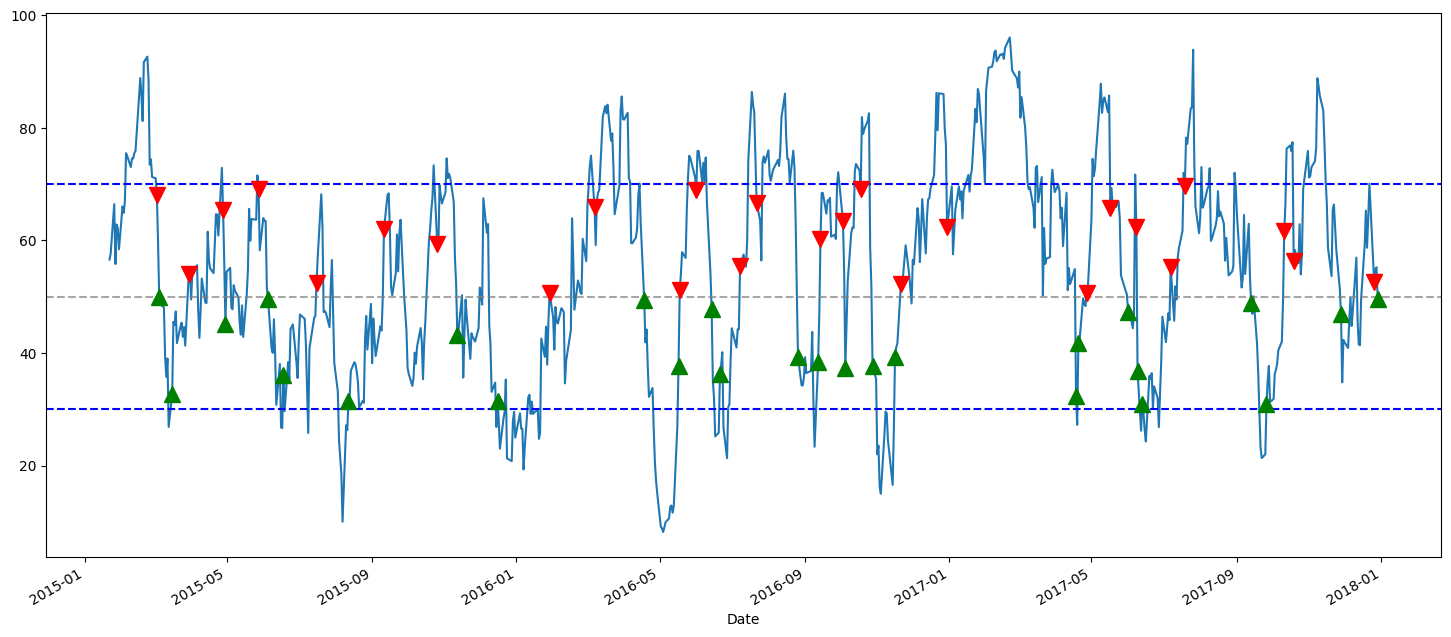

In [81]:
plot_RSI(RSI)

In [82]:
def plot_RSI_values(stock_data):
    # Visualize buy and sell positions
    plt.figure(figsize=(15, 7))
    plt.plot(stock_data["Adj Close"], label="AAPL Price")
    
    plt.plot(stock_data.loc[stock_data.trading_signal == -1].index,stock_data.loc[stock_data.trading_signal == -1]["Adj Close"]
                 ,"v",
                color="red",
                markersize=12,
                label="Sell Signal")
    
    plt.plot(stock_data.loc[stock_data.trading_signal == 1].index,stock_data.loc[stock_data.trading_signal == 1]["Adj Close"]
                 ,"^",
                color="green",
                markersize=12,
                label="Buy Signal")
    
    plt.legend()
    plt.show()

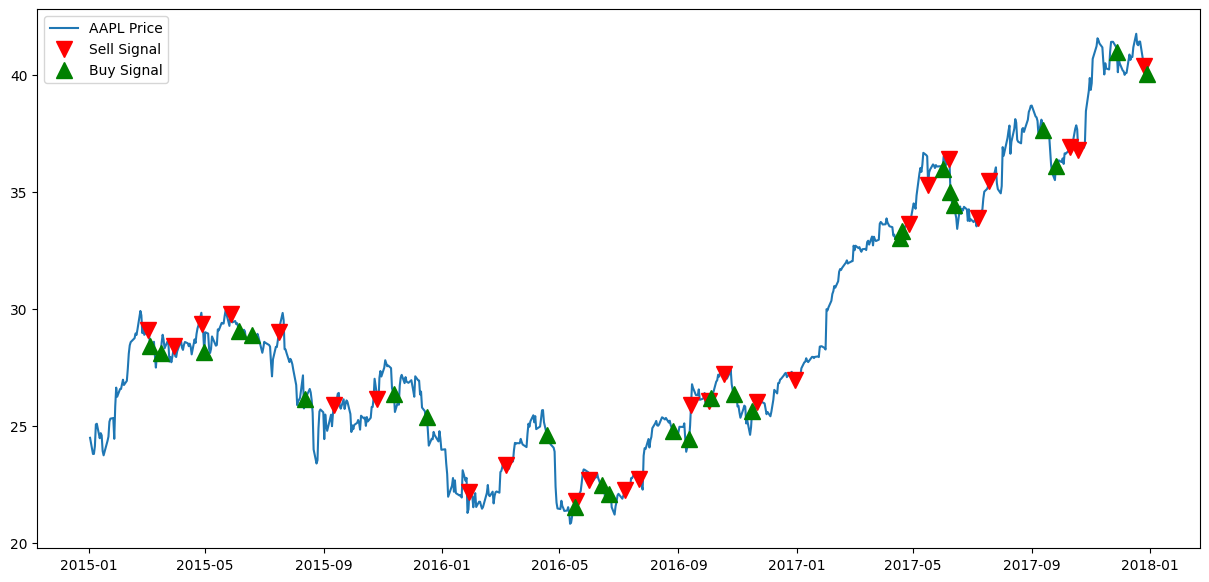

In [83]:
plot_RSI_values(RSI)

### Cumulative Returns

In [100]:
# commision
def calculate_returns(stock_data, initial_capital):
    stock_data['log_returns'] = np.log(stock_data['Adj Close'] / stock_data['Adj Close'].shift(1))
    stock_data['cumulative_returns'] = stock_data['log_returns'].dropna().cumsum().apply(np.exp)
    stock_data['capital'] = initial_capital

    stock_data['strategy_return'] = (stock_data['position'].shift(1) * stock_data['log_returns'])
    stock_data = stock_data.dropna()

    for i in range(len(stock_data.index)):
        if stock_data['trading_signal'][i] != 0:
            stock_data['capital'][i] -= 5
            stock_data['capital'][i] = stock_data['capital'][i-1] * (stock_data['strategy_return'].apply(np.exp)[i])
        else:
            stock_data['capital'][i] = stock_data['capital'][i-1] * (stock_data['strategy_return'].apply(np.exp)[i])

    stock_data['cumulative_strategy_returns'] = (stock_data['capital'] / initial_capital)
    stock_data['max_gross_strategy_performance'] = stock_data['cumulative_strategy_returns'].cummax()
    
    return stock_data


In [85]:
returns = calculate_returns(RSI, 100000)

In [86]:
returns['cumulative_strategy_returns'][-1]

0.6834650775649874

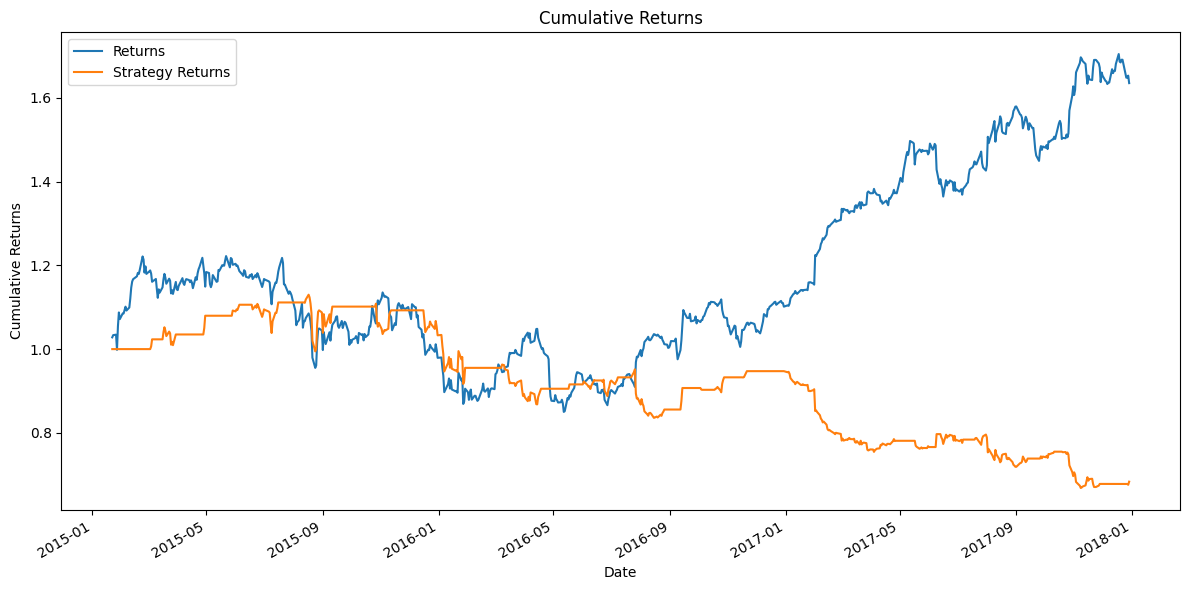

In [87]:
plot_cumulative_returns(returns)

### Drawdowns

In [88]:
calculate_drawdown_periods(returns)

{43: -0.040632046876343586,
 4: -0.001991655266483705,
 2: -0.000780924352739909,
 6: -0.010009597937087333,
 22: -0.06275828020732077,
 865: -0.40855945205020183}

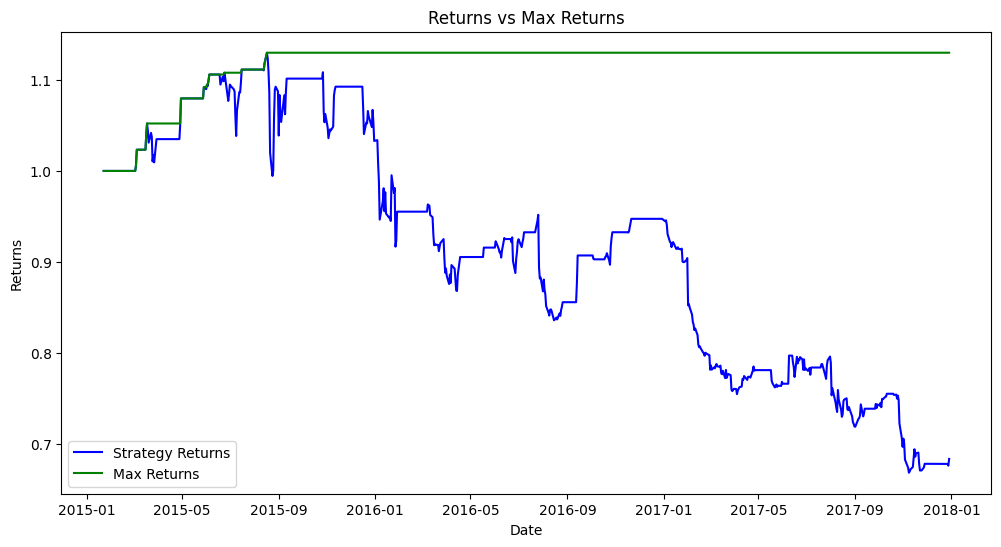

In [89]:
plot_returns_and_max_returns(returns)